# Investigating Chicago Graffiti: Analyzing Patterns of Urban Vandalism and City Response
Name: Christine Glascott 

Email: cag301@pitt.edu

## Abstract
As a native Chicagoan, a key feature I always notice about the city environment is the 
variety of graffiti nearly covering every surface. From tags in alleys to cartoon characters on 
highway walls near my house, I am fascinated by how quickly vandalism appears and 
disappears. Sometimes it can be covered up, only to be replaced with new graffiti the next day. 
This ongoing cycle draws my curiosity to explore data about city service requests for graffiti 
removal from 311_Service_Requests_-_Graffiti_Removal_-_Historical.csv ,  particularly to 
understand how these patterns can reflect safety and urban development across Chicago 
neighborhoods.

I aim to explore how these service reports can reflect the quality of life in different 
Chicago neighborhoods, as well as the general need for removal and local protection resources 
for various city districts. By analyzing common trends among reported locations and styles of 
vandalism, I seek to predict what areas are more likely to be vandalized again. The results of this 
analysis can be useful to city residents and business owners to help protect their properties and 
communities, and to potential property buyers when considering areas with high risk of property 
damage. Additionally, police and other local law enforcement agencies can use these findings to 
identify key areas that require increased patrol and preventive action against vandalism. 

To begin analyzing, I will first clean through the data to remove any rows that are 
missing information or filling in the blanks where possible. Then, I will reformat the data to find 
counts of ZIP codes, police districts, and other relevant factors to determine 
highly graffitied areas. I will also be observing the time of the removal process to determine how 
many days each case took. Through these insights, I plan to uncover patterns in the 
time, location, and other factors to predict the likelihood of the recurring vandalism in certain 
areas.  

**Research Question:** Which factors (e.g., location, surface type, or police district) most significantly predict the recurrence of graffiti vandalism and the time-to-removal in Chicago neighborhoods?

## Introduction

Graffiti has been a very prevalent feauture of the Chicago landscape since the 1980s (**http://www.encyclopedia.chicagohistory.org/pages/535**). There have been many works welcomed by the community and considered public art, but for majority of other cases, it has been seen as vandalism. Through my personal exploration of Chicago, it is very clear to visually dicipher murals compared to tags and other markings which reflect underlying challenges in public safety, neighborhood maintenance, and city responsiveness. Yet, Chicago offers services to residents to remove graffitti for free as a part of it's commitment to "anti-crime and beautification programs." (**https://www.chicago.gov/city/en/depts/streets/provdrs/graffiti_blasters/svcs/graffiti_removal.html**) The Graffiti Removal program either powerwash the surface or paint over it depending on the surface material. It can take a upto a few days to remove the vandalism, but in popular areas, it seems that regardless how well it was removed, people will still graffiti the same area again. 

This project will explore historical data from Chicago’s 311 Service Requests for graffiti removal to uncover patterns in urban vandalism, particularly to predict where graffiti is likely to occur again and how long removal might take. By focusing on geographic, time, and surface-related features, this analysis offers insights that can inform proactive urban management strategies. The findings could benefit city planners, property owners, community organizations, and law enforcement by providing evidence-based predictions for graffiti recurrence and removal efforts across neighborhoods.

## Methodology

To begin investigating, I acquired a dataset on 311 reports from the City of Chicago and uploaded it into a Jupyter Notebook. I started by counting and visualizing where data was missing. I dropped irrelevant columns like service request type and SSA number, and removed rows with missing critical data, including ZIP Code, surface type, and more. Then, I used start and end times to calculate completion time in days.

To refine this data further, I used the IQR method and a rarity function to remove outliers, especially extreme values, from key columns. I then saved count-based features to represent graffiti activity levels, including ZIP Code Count, Ward Count, Police District Count, and Community Area Count. I also created categorical features like Surface Type and Surface Location.

After that, I made visualizations to explore the data, then moved on to transforming and scaling it. For skewed numeric data, I applied log and square-root transformations where needed, and then standardized everything using StandardScaler.

Once the data was cleaned and transformed, I looked at how the columns related to each other. Based on the correlations, I selected my features: Type Count, Surface Count, Creation Month, ZIP Code Count, Police District Count, Ward Count, Community Area Count, Latitude, and Longitude. I focused on two main targets: Completion Time and ZIP Code.

For modeling, I trained and evaluated four main models: a Random Forest Classifier to predict whether graffiti was removed within one day, a Decision Tree Classifier to identify ZIP Codes with high graffiti activity, a Logistic Regression model for comparison on ZIP classification, and a Random Forest Regressor to predict the volume of graffiti reports by ZIP Code.

I used train/test splits with stratification and validated all models using accuracy, AUC, classification reports, confusion matrices, R², and RMSE scores. Finally, I cross validated all the models using SKFold and KFold to ensure reliability and validity.

Out of all the models, the Random Forest Regressor performed the best by far, with an R² score of 0.99 when predicting ZIP Code Count. It showed the strongest fit, especially compared to the other regression and classification models, and gave the most reliable predictions for where graffiti activity is concentrated.

## Exploratory Data Analysis & Data Cleaning

Imports

In [276]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#specific sklearn libraries 
from sklearn import preprocessing as prep
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
%matplotlib inline

Read & Peek at Data File

In [277]:
df = pd.read_csv('311_Service_Requests_-_Graffiti_Removal_-_Historical_20250304.csv')
df.head()

Creation Date           Status Completion Date Service Request Number  \
0    12/11/2017        Completed      12/12/2017            17-08320282   
1    12/12/2017        Completed      12/12/2017            17-08340031   
2    12/12/2017        Completed      12/12/2017            17-08339815   
3    12/11/2017        Completed      12/12/2017            17-08309316   
4    12/12/2017  Completed - Dup      12/12/2017            17-08331494   

  Type of Service Request What Type of Surface is the Graffiti on?  \
0        Graffiti Removal                          Metal - Painted   
1        Graffiti Removal     Cement (Sidewalk, Alley, Wall, Curb)   
2        Graffiti Removal                        Metal - Unpainted   
3        Graffiti Removal                        Brick - Unpainted   
4        Graffiti Removal                          Brick - Painted   

  Where is the Graffiti located?        Street Address  ZIP Code  \
0                           Rear   3709 W MONTROSE AVE   60618.0   
1                           Side  2854 N MILWAUKEE AVE   60618.0   
2            Traffic Control Box    4446 W CHICAGO AVE   60651.0   
3                          Front  6044 W FULLERTON AVE   60639.0   
4                          Front     3200 S ARCHER AVE   60608.0   

   X Coordinate  Y Coordinate  Ward  Police District  Community Area  SSA  \
0  1.150828e+06  1.928986e+06  35.0             17.0            16.0  NaN   
1  1.152762e+06  1.918823e+06  35.0             14.0            21.0  NaN   
2  1.146582e+06  1.904952e+06  37.0             11.0            23.0  NaN   
3  1.135600e+06  1.915315e+06  30.0             25.0            19.0  NaN   
4  1.165396e+06  1.883504e+06  25.0              9.0            59.0  NaN   

    Latitude  Longitude                             Location  
0  41.960925 -87.720860  (41.960924779554, -87.720860405725)  
1  41.933092 -87.714233  (41.933091717828, -87.714232734389)  
2  41.895261 -87.737833  (41.895260892937, -87.737833480298)  
3  41.923908 -87.777543  (41.923908337529, -87.777542542513)  
4  41.835958 -87.668790  (41.835958018486, -87.668790266538)

## Dealing with Missing Values

In [278]:
#Identify column titles
df.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'Street Address', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [279]:
#Count total missing entries for each column
df.isnull().sum()

Creation Date                                    0
Status                                           0
Completion Date                                170
Service Request Number                           0
Type of Service Request                          0
What Type of Surface is the Graffiti on?      5256
Where is the Graffiti located?                6311
Street Address                                   0
ZIP Code                                       758
X Coordinate                                   157
Y Coordinate                                   157
Ward                                           135
Police District                                136
Community Area                                 135
SSA                                         793806
Latitude                                       638
Longitude                                      638
Location                                       638
dtype: int64

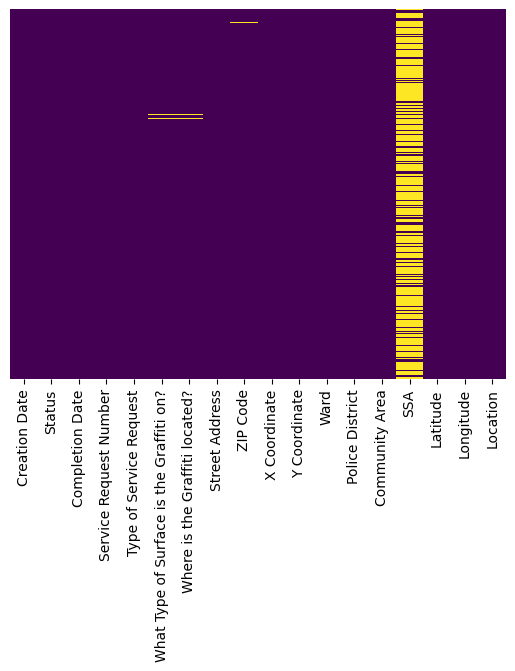

In [280]:
#Visualize missing data
sn.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

From this visual, it is very clear to see that the majority of entries are missing inputs in the SSA column. SSA stands for Special Service Areas, which "are local tax districts that fund expanded services and programs, to foster commercial and economic development, through a localized property tax" (https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Graffiti-Removal-Historical/hec5-y4x5/about_data). SSA is basically another way to identify smaller communities within certain areas, but it may be very difficult to identify this missing point of many entries since not every address is apart of an SSA and the SSA districts can change yearly. 

Thus, it is best to ignore this column in the data set to avoid confusion. Also, it would be best to remove the type of service request column since all the entries are the same request, "Graffiti Removal." X and Y coordinate columns will also be removed, since latiude and longitude have been provided

In [281]:
#Drop columns 
df = df.drop('SSA', axis=1)
df = df.drop('Type of Service Request', axis=1)
df = df.drop('X Coordinate', axis=1)
df = df.drop('Y Coordinate', axis=1)

All other rows with missing values will be dropped because all information for each report is crucial to keep data cohesive. Futhermore, there is very minimal rows from reports missing data, so removing them would not greatly impact the accuracy of the future prediction model.

In [282]:
#Drop any more rows with missing values
#Final - Remove any rows with missing data
df=df.dropna(subset=['Completion Date', 'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'ZIP Code', 'Ward', 'Police District',
       'Community Area', 'Latitude', 'Longitude', 'Location']) 

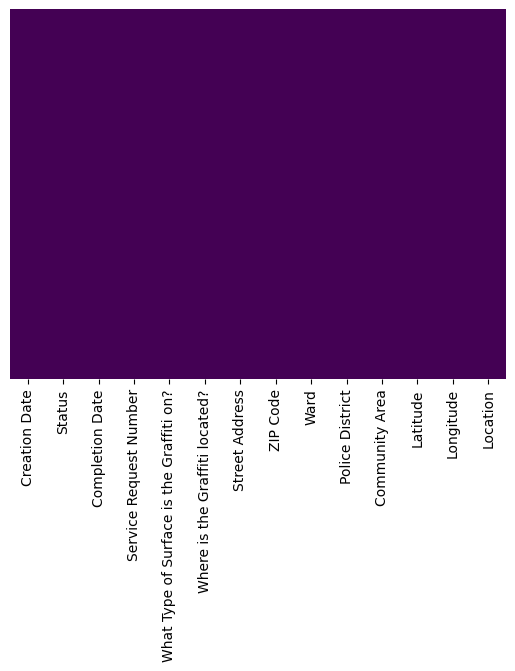

In [283]:
#Visualize missing data again to check everything was properly removed
sn.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Now every row includes entries for every columns, which can be used for analysis later. 

## Dealing with outliers

In [284]:
df.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'Street Address', 'ZIP Code', 'Ward',
       'Police District', 'Community Area', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### Ignore the following columns when removing outliers
- Status - all reports have been completed, so all have same status
- Service Request Number -- just an ID 
- Street Address -- specific, also similar to ID
- Location - is pairs of latitude and longitude already provide

### Make Copy of Dataframe --> new dataframe will be for cleaned data

In [285]:
df_Clean = df.copy()
df_Clean.shape

(1044114, 14)

### Identifying outliers in Completion Time (Days)

In [286]:
df_Clean['Creation Date'] = pd.to_datetime(df_Clean['Creation Date'], format="%m/%d/%Y")
df_Clean['Completion Date'] = pd.to_datetime(df_Clean['Completion Date'], format="%m/%d/%Y")

#Calculate 
df_Clean['Completion Time (Days)'] = (df_Clean['Completion Date'] - df_Clean['Creation Date']).dt.days

#plot
plt.figure(figsize=(8, 4))
sn.boxplot(x=df_Clean['Completion Time (Days)'])
plt.title("Boxplot of Completion Time (Days)")
plt.show()

#Determine IQR
q1 = df_Clean['Completion Time (Days)'].quantile(0.25)
q3 = df_Clean['Completion Time (Days)'].quantile(0.75)
iqr = q3 - q1
#define bounds
low = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr

df_Clean = df_Clean[(df_Clean['Completion Time (Days)'] >= low) & (df_Clean['Completion Time (Days)'] <= up)]

#plot
plt.figure(figsize=(8, 4))
sn.boxplot(x=df_Clean['Completion Time (Days)'])
plt.title("Boxplot of Completion Time (Days)")
plt.show()

df_Clean.shape

(897869, 15)

While there are still some high outliers, it should be kept to address the significant amount of cases that took over the typical 2 day removal process.

In [287]:
#Find most popular month
df_Clean['Creation Month'] = df_Clean['Creation Date'].dt.month

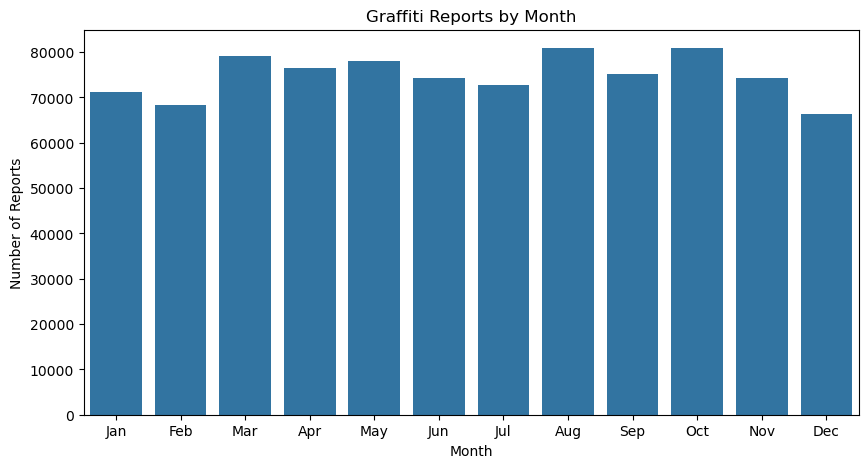

In [288]:
plt.figure(figsize=(10,5))
sn.countplot(x=df_Clean['Creation Month'])
plt.title("Graffiti Reports by Month")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In order to find the total days it took to remove graffiti, I compared the the creation to the completion date. To then remove outliers from this data, I performed IQR to remove any values that fell outside the 1.5 range. This ensures that unusual times which could be due to data entry errors or exceptional cases, do not skew the overall distribution.

I also created a new column to specifically look a the months were the grafitti was created to be analyzed later. 

### Identifying outliers by Geography
- Chicago City Range Coordinates
    - Longitude: approximately 87°30' to 88°00' West.
    - Latitude:approximately 41°30' to 42°06' North.

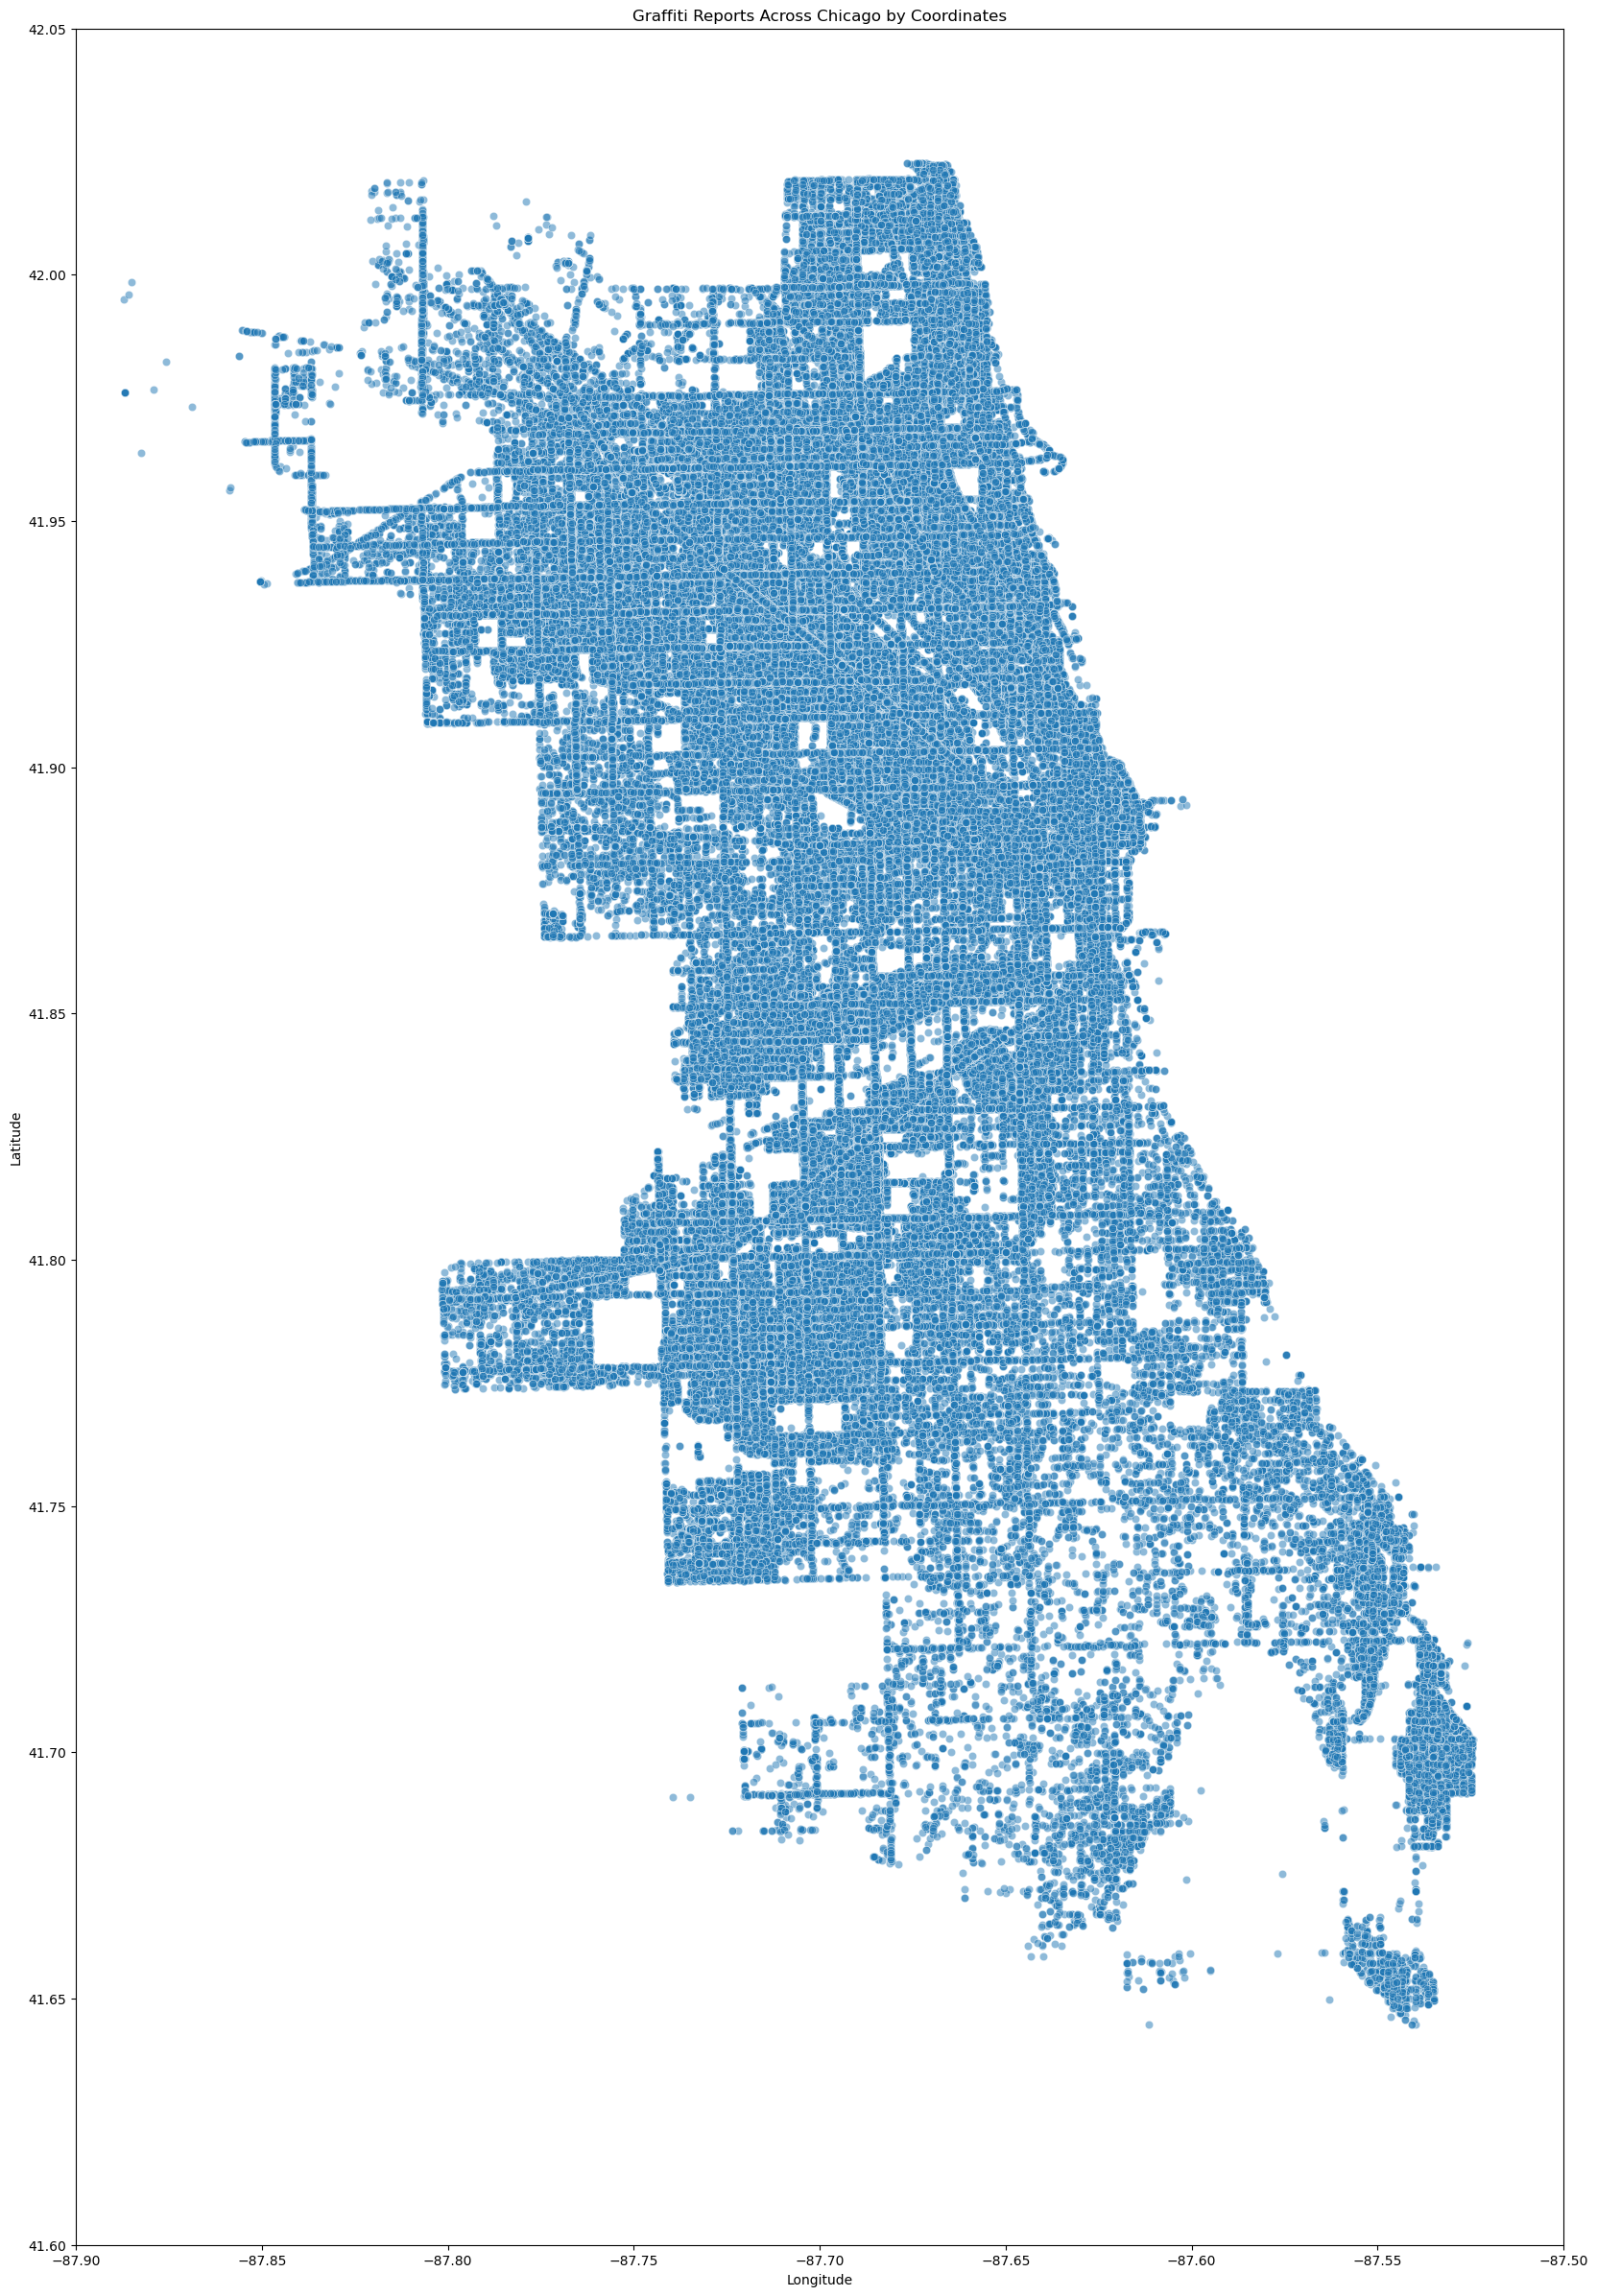

In [289]:
#Create Scatter Plot to pin point areas that have been grafittied
plt.figure(figsize=(20, 30))
sn.scatterplot(x=df_Clean['Longitude'], y=df_Clean['Latitude'], alpha=0.5)
#Specifically zoom in on Chicago range, expanding it too see better overall view 
plt.xlim(-87.9, -87.5)
plt.ylim(41.60, 42.05) 
plt.title("Graffiti Reports Across Chicago by Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

This visualization of coordinates is almost a mirror image to a map of Chicago. Visually you can tell that roads and major highways are typically graffiti the most and areas that form almost perfect blank squares represent airports, parks, and more. Furthermore the right of the graph represents where Lake Michigan resides along the city.

To get more percise data, I will remove any data points outside the very specific city limits.

In [290]:
# Define Chicago boundary limits
lat_bounds = (41.60, 42.05)
long_bounds = (-87.9, -87.5)

# Filter out rows that fall outside these limits
df_Clean = df_Clean[((df_Clean['Latitude'] >= lat_bounds[0]) & (df_Clean['Latitude'] <= lat_bounds[1])) & 
                    ((df_Clean['Longitude'] >= long_bounds[0]) & (df_Clean['Longitude'] <= long_bounds[1]))]

plt.figure(figsize=(20, 30))
plt.scatter(df_Clean['Longitude'], df_Clean['Latitude'], alpha=0.5)
plt.xlim(long_bounds)
plt.ylim(lat_bounds)
plt.title("Graffiti Reports Across Chicago by Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

df_Clean.shape

(897857, 16)

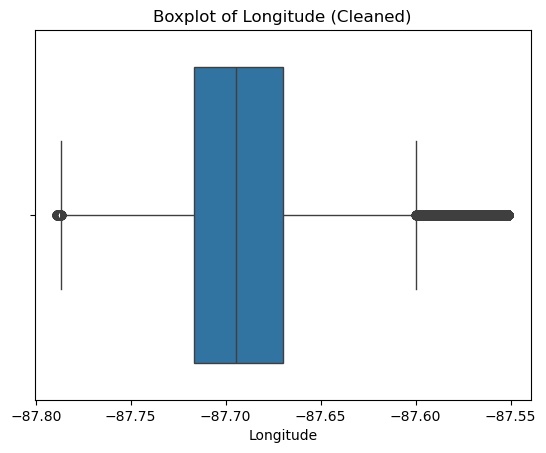

In [291]:
#Remove other extreme outliers 
df_Clean = df_Clean[df_Clean['Latitude'].between(df_Clean['Latitude'].quantile(0.01), df_Clean['Latitude'].quantile(0.99))]
df_Clean = df_Clean[df_Clean['Longitude'].between(df_Clean['Longitude'].quantile(0.01), df_Clean['Longitude'].quantile(0.99))]

#boxplot for Latitude
sn.boxplot(x=df_Clean['Latitude'])
plt.title("Boxplot of Latitude (Cleaned)")
plt.xlabel("Latitude")
plt.show()

#boxplot for Longitude
sn.boxplot(x=df_Clean['Longitude'])
plt.title("Boxplot of Longitude (Cleaned)")
plt.xlabel("Longitude")
plt.show()

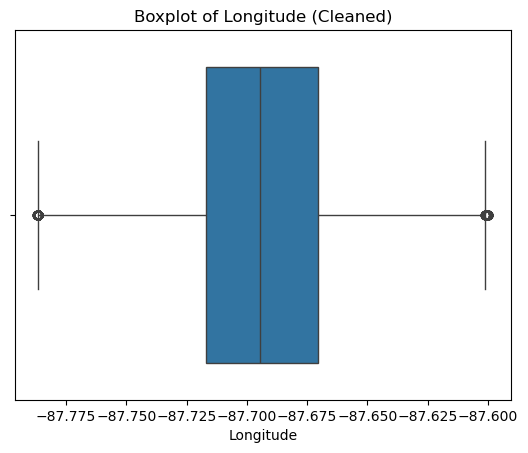

In [292]:
q1 = df_Clean['Longitude'].quantile(0.25)
q3 = df_Clean['Longitude'].quantile(0.75)
iqr = q3 - q1

#filter
df_Clean = df_Clean[df_Clean['Longitude'] >= (q1 - 1.5 * iqr)]
df_Clean = df_Clean[df_Clean['Longitude'] <= (q3 + 1.5 * iqr)]

#boxplot for Longitude
sn.boxplot(x=df_Clean['Longitude'])
plt.title("Boxplot of Longitude (Cleaned)")
plt.xlabel("Longitude")
plt.show()

There still appears to be outliers, but I will not be setting stricter bounds to remove them, since it will cut a large portion of the data points and limit representation of locations. 

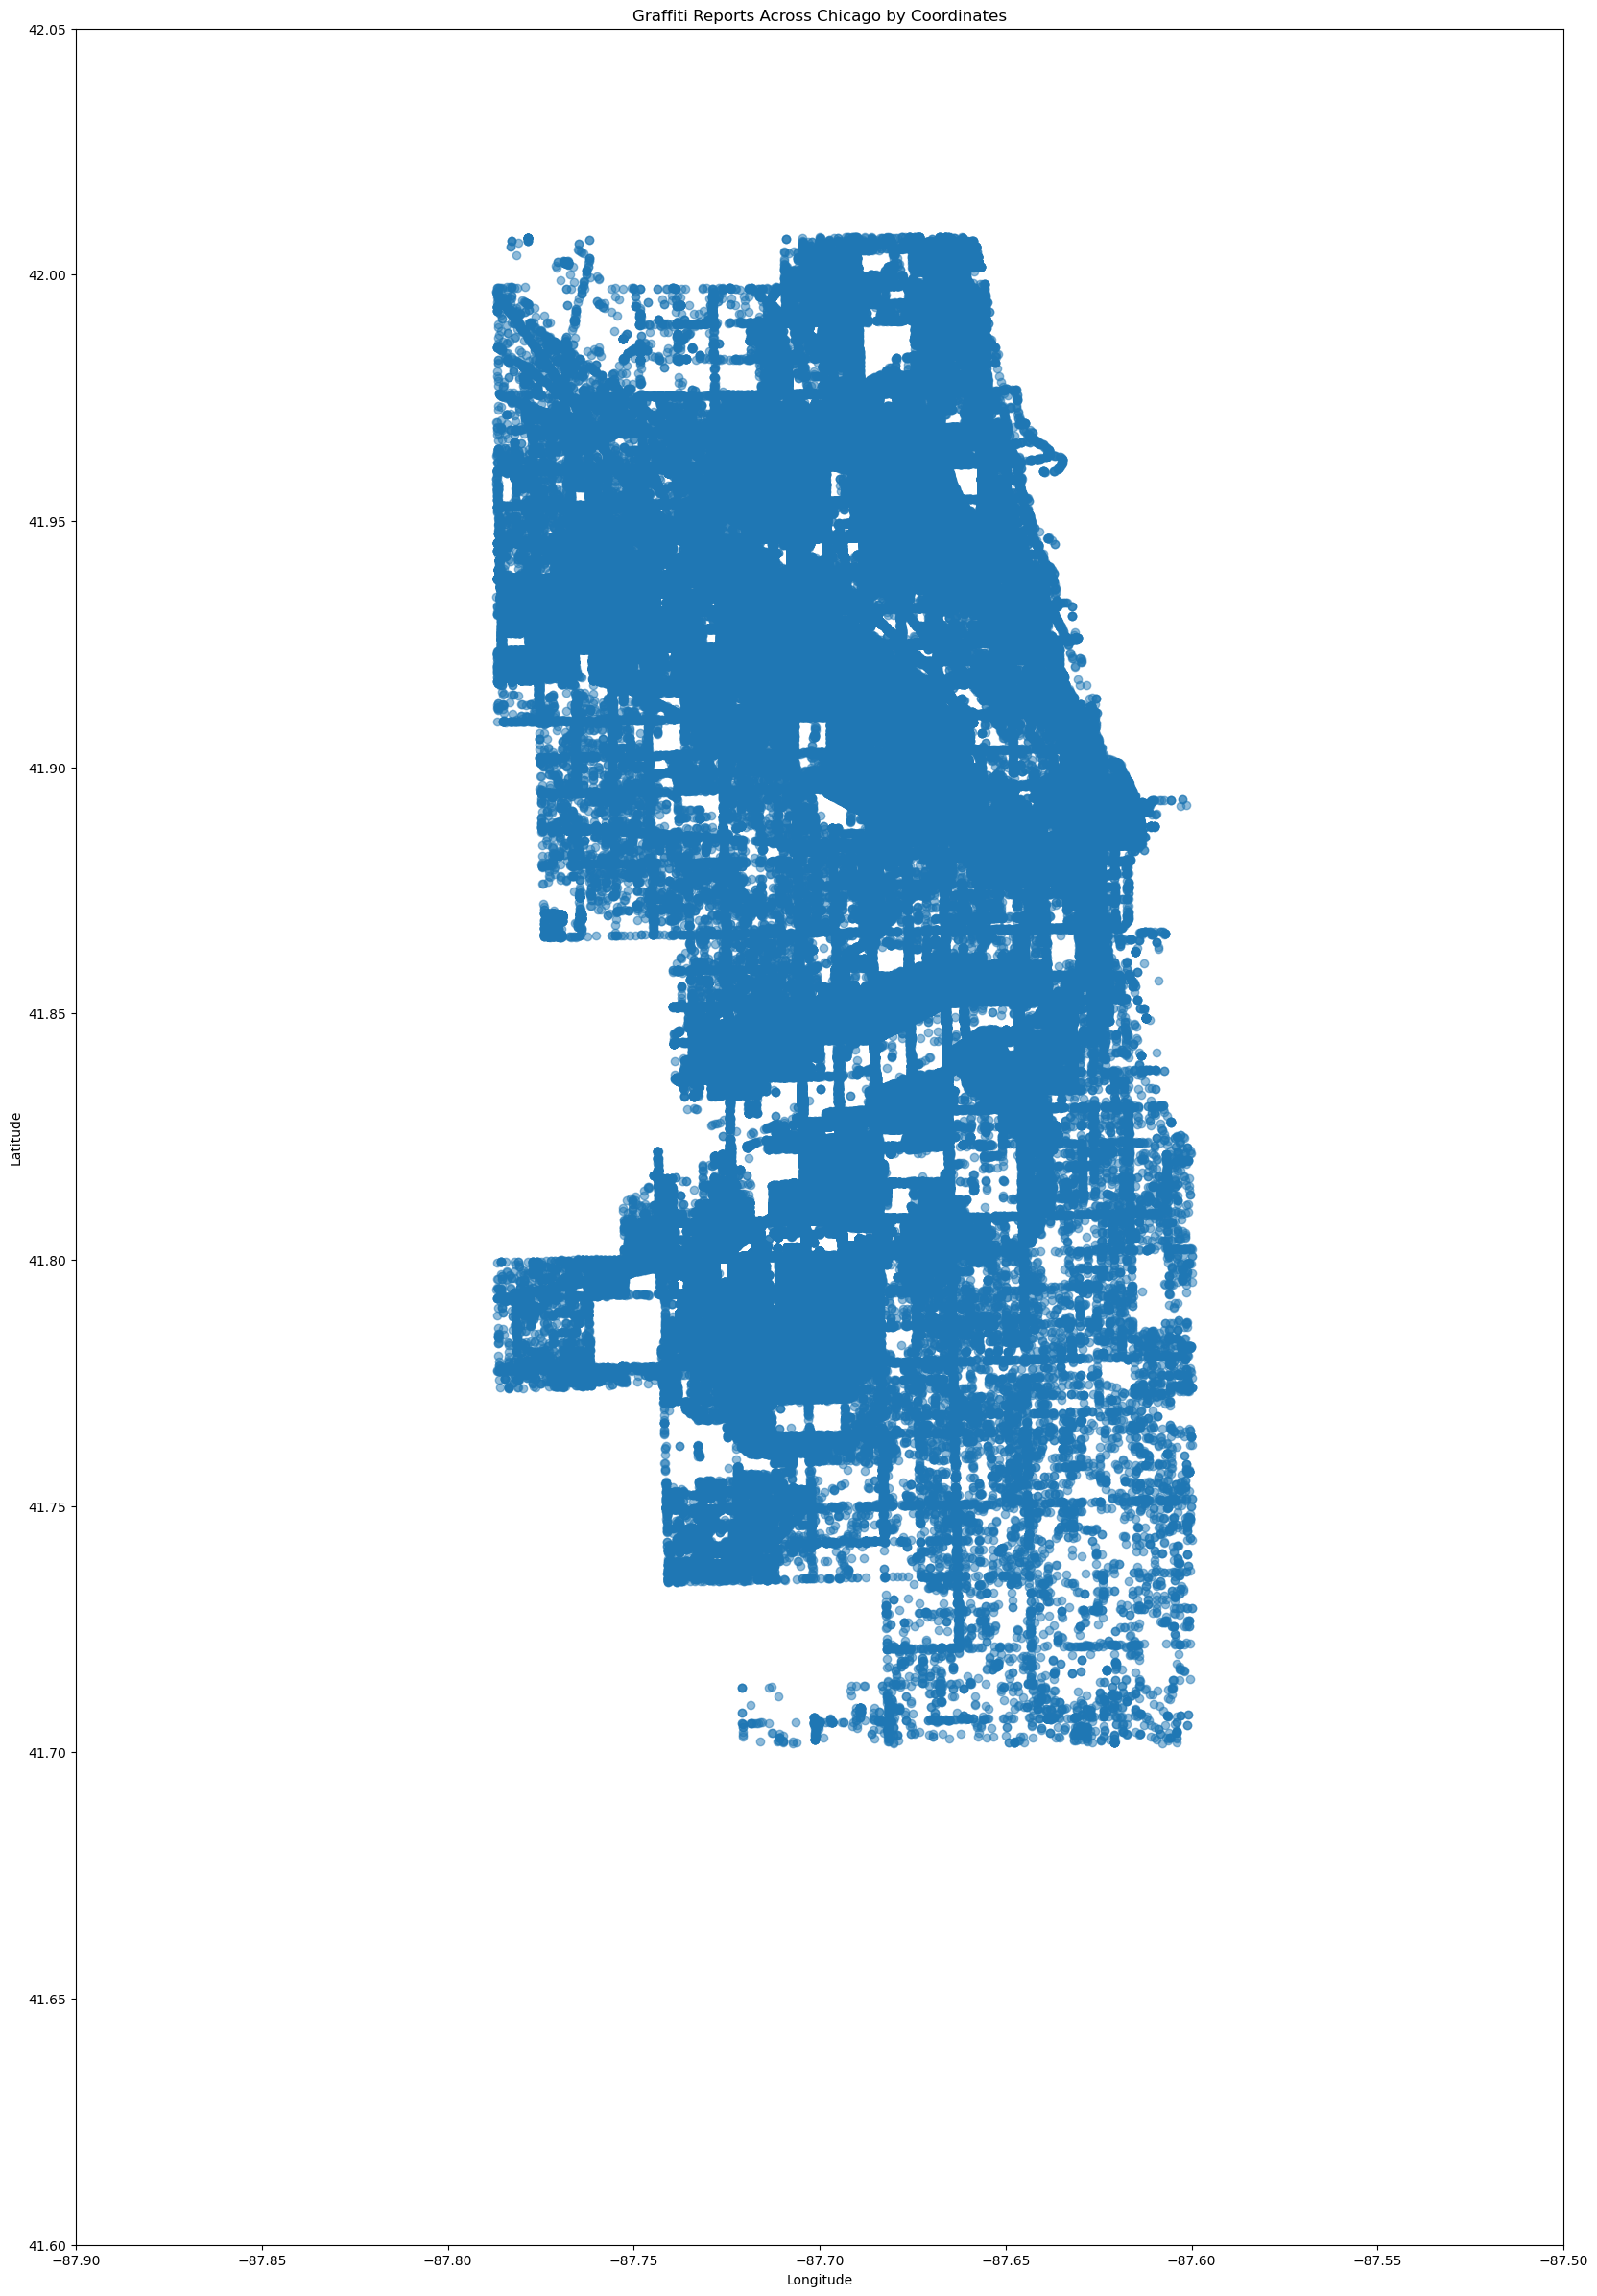

In [293]:
plt.figure(figsize=(20, 30))
plt.scatter(df_Clean['Longitude'], df_Clean['Latitude'], alpha=0.5)
plt.xlim(long_bounds)
plt.ylim(lat_bounds)
plt.title("Graffiti Reports Across Chicago by Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [294]:
df_Clean.shape

(853189, 16)

Very minimal outliers (less than 15) were removed by setting the City Bounds, so I performed another removal to specifically focus only on extreme outliers in the location points. There was significant high and low outliers for the longitude still, so I applied IQR to further clean the data. Thus points that are further from the center of the city, will be removed since they are less commonly graffitied.

## Method to remove extreme values from categorical columns

In [295]:
def remove_rarity(df, column, percent=0.01):
    threshold = percent * len(df)
    valid_values = df[column].value_counts()
    valid_values = valid_values[valid_values >= threshold].index.tolist()
    return df[df[column].isin(valid_values)]

### Identifying outliers of what surface materials were graffitied

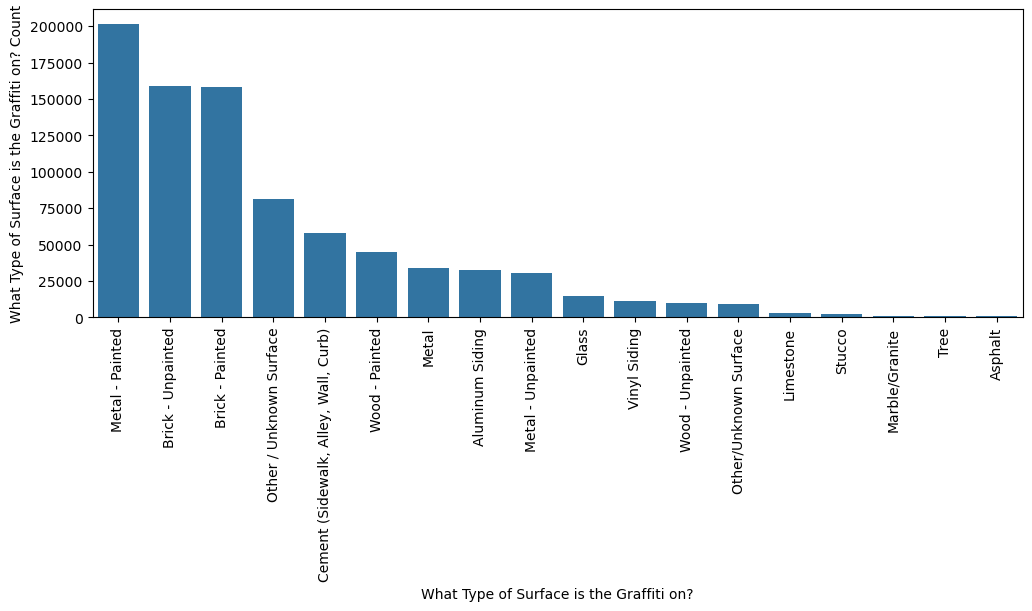

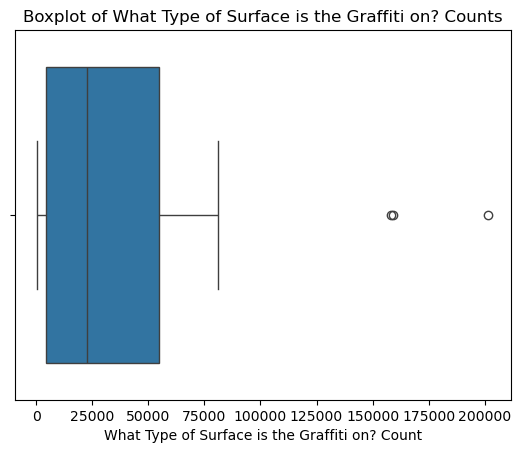

(845056, 16)

In [296]:
#reports by type 
type_counts = df_Clean['What Type of Surface is the Graffiti on?'].value_counts().reset_index()
type_counts.columns = ['What Type of Surface is the Graffiti on?', 'What Type of Surface is the Graffiti on? Count']

plt.figure(figsize=(12, 4))
sn.barplot(x='What Type of Surface is the Graffiti on?', y='What Type of Surface is the Graffiti on? Count', data=type_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=type_counts['What Type of Surface is the Graffiti on? Count'])
plt.title("Boxplot of What Type of Surface is the Graffiti on? Counts")
plt.show()

#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'What Type of Surface is the Graffiti on?')

df_Clean.shape

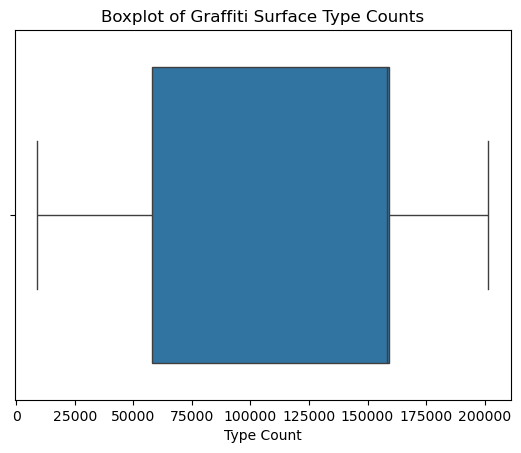

In [297]:
#save cleaned count
type_counts_cleaned = df_Clean['What Type of Surface is the Graffiti on?'].value_counts()
df_Clean['Type Count'] = df_Clean['What Type of Surface is the Graffiti on?'].map(type_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['Type Count'])
plt.title("Boxplot of Graffiti Surface Type Counts")
plt.show()

To remove outliers from the type, I filtered out values that made up less than 1% of the data. This removed uncommon or rare surface types, preventing them from skewing the analysis

### Identify outliers of "what" was graffitied

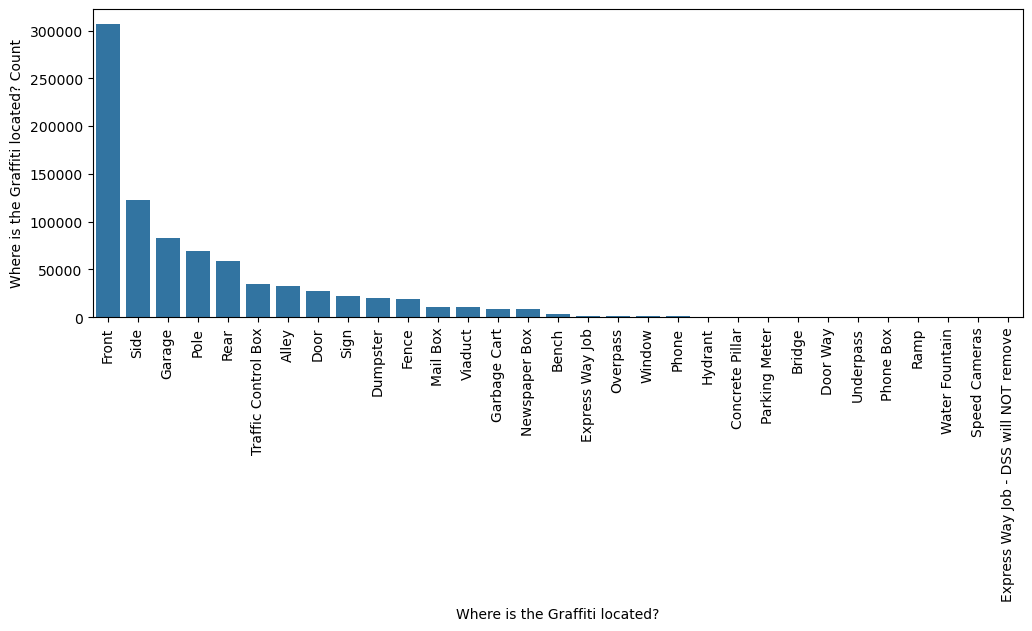

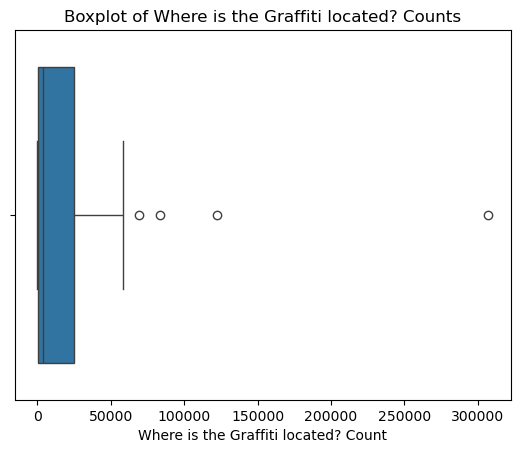

(834909, 17)

In [298]:
#reports by type 
surface_counts = df_Clean['Where is the Graffiti located?'].value_counts().reset_index()
surface_counts.columns = ['Where is the Graffiti located?', 'Where is the Graffiti located? Count']
plt.figure(figsize=(12, 4))
sn.barplot(x='Where is the Graffiti located?', y='Where is the Graffiti located? Count', data=surface_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=surface_counts['Where is the Graffiti located? Count'])
plt.title("Boxplot of Where is the Graffiti located? Counts")
plt.show()

#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'Where is the Graffiti located?')

df_Clean.shape

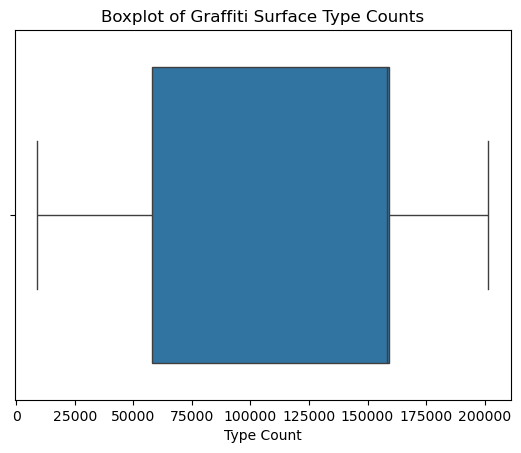

In [299]:
#Save cleaned count
surface_counts_cleaned = df_Clean['What Type of Surface is the Graffiti on?'].value_counts()
df_Clean['Surface Count'] = df_Clean['What Type of Surface is the Graffiti on?'].map(surface_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['Type Count'])
plt.title("Boxplot of Graffiti Surface Type Counts")
plt.show()

To remove outliers from the type, I filtered out of the "what was graffitied?" that made up less than 1% of the data. This removed uncommon or rare surface types, preventing them from skewing the analysis

## Identify outliers of ZIP codes

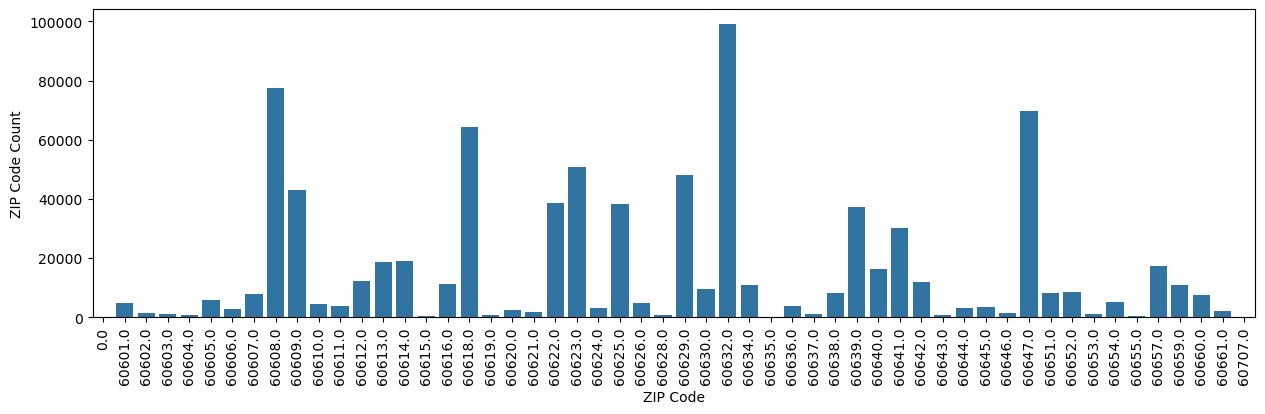

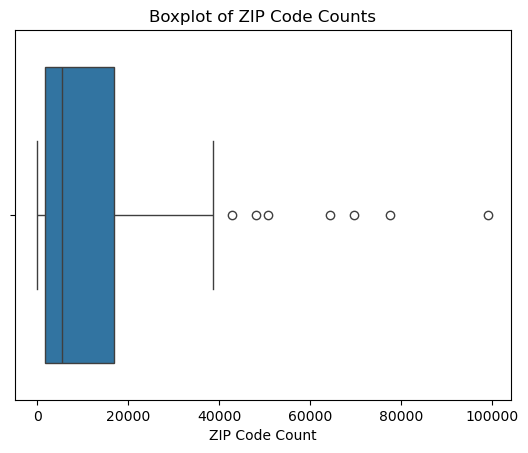

(742269, 18)

In [300]:
#reports by ZIP Code
zip_counts = df_Clean['ZIP Code'].value_counts().reset_index()
zip_counts.columns = ['ZIP Code', 'ZIP Code Count']
plt.figure(figsize=(15, 4))
sn.barplot(x='ZIP Code', y='ZIP Code Count', data=zip_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=zip_counts['ZIP Code Count'])
plt.title("Boxplot of ZIP Code Counts")
plt.show()

#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'ZIP Code')

df_Clean.shape

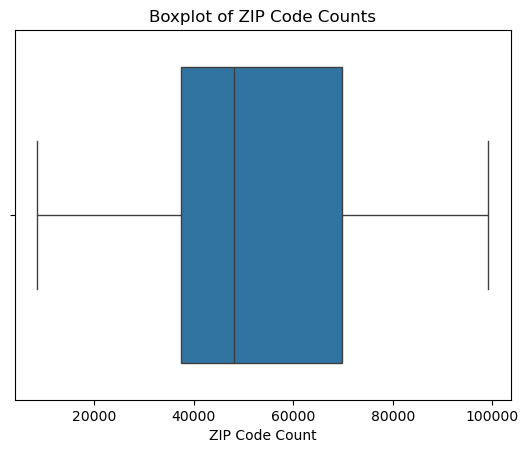

In [301]:
#Save cleaned count
zip_counts_cleaned = df_Clean['ZIP Code'].value_counts()
df_Clean['ZIP Code Count'] = df_Clean['ZIP Code'].map(zip_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['ZIP Code Count'])
plt.title("Boxplot of ZIP Code Counts")
plt.show()

To remove outliers from the ZIP Code, I filtered out of the ZIP Code areas that made up less than 1% of the data. This removed uncommon or rare areas to be vandalized preventing them from skewing the analysis of areas that are regularly graffitied.

## Identify outliers based on Ward Distict

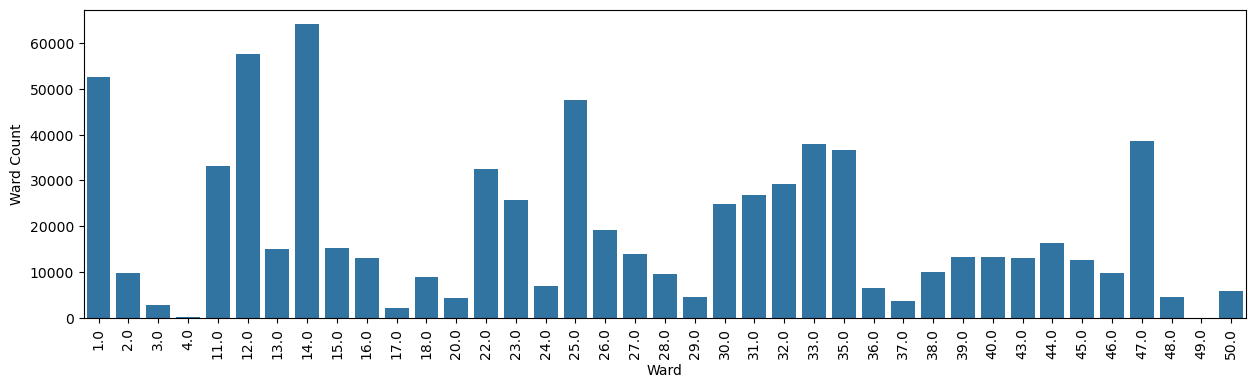

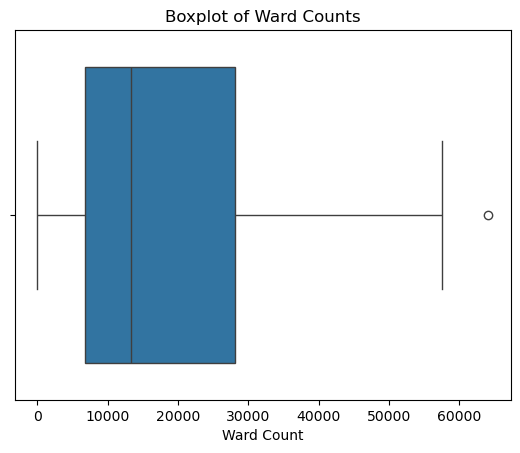

(700498, 19)

In [302]:
#Reports by Ward
ward_counts = df_Clean['Ward'].value_counts().reset_index()
ward_counts.columns = ['Ward', 'Ward Count']
plt.figure(figsize=(15, 4))
sn.barplot(x='Ward', y='Ward Count', data=ward_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=ward_counts['Ward Count'])
plt.title("Boxplot of Ward Counts")
plt.show()

#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'Ward')

df_Clean.shape

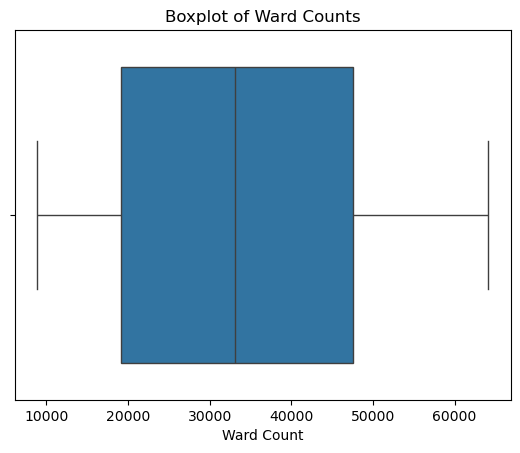

In [303]:
#Save cleaned data
ward_counts_cleaned = df_Clean['Ward'].value_counts()
df_Clean['Ward Count'] = df_Clean['Ward'].map(ward_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['Ward Count'])
plt.title("Boxplot of Ward Counts")
plt.show()

To remove outliers from the Ward Districts, I filtered out of the Wards that made up less than 1% of the data. This removed uncommon or rare Wards areas that are rarely graffitied.

## Identify Oultiers based on Police District

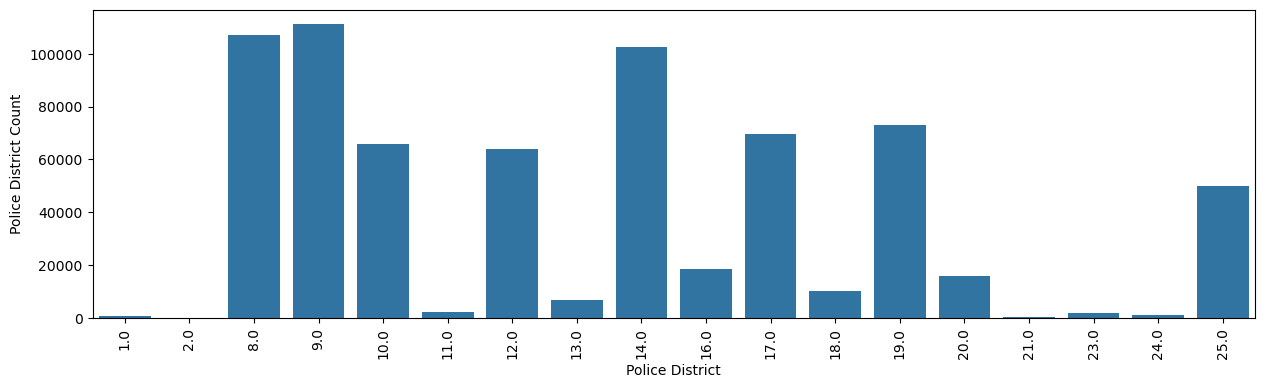

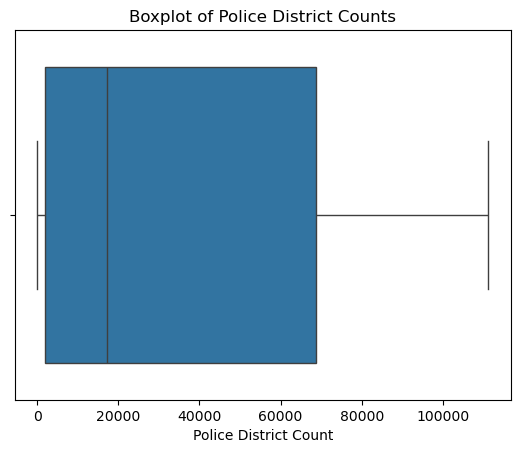

(700498, 20)

In [304]:
#Reports by Police District
police_counts = df_Clean['Police District'].value_counts().reset_index()
police_counts.columns = ['Police District', 'Police District Count']
plt.figure(figsize=(15, 4))
sn.barplot(x='Police District', y='Police District Count', data=police_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=police_counts['Police District Count'])
plt.title("Boxplot of Police District Counts")
plt.show()

df_Clean.shape

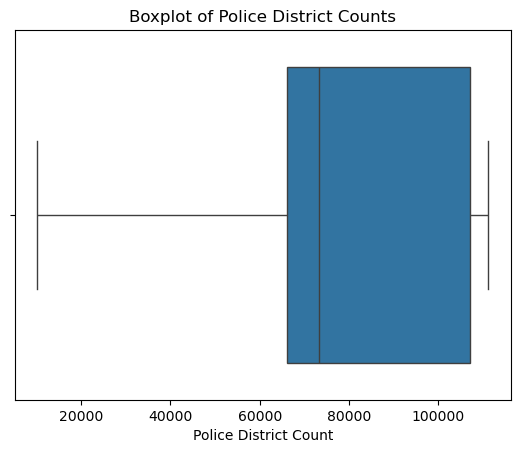

In [305]:
#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'Police District')
#Save cleaned data
police_counts_cleaned = df_Clean['Police District'].value_counts()
df_Clean['Police District Count'] = df_Clean['Police District'].map(police_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['Police District Count'])
plt.title("Boxplot of Police District Counts")
plt.show()

After viewing the boxplot of the Police Districts, there appears to be no outliers, but to match other cleaning methods applied to similar I applied the rarity method to remove any disticts that could skew the data later. 

## Identify outliers from Community Area

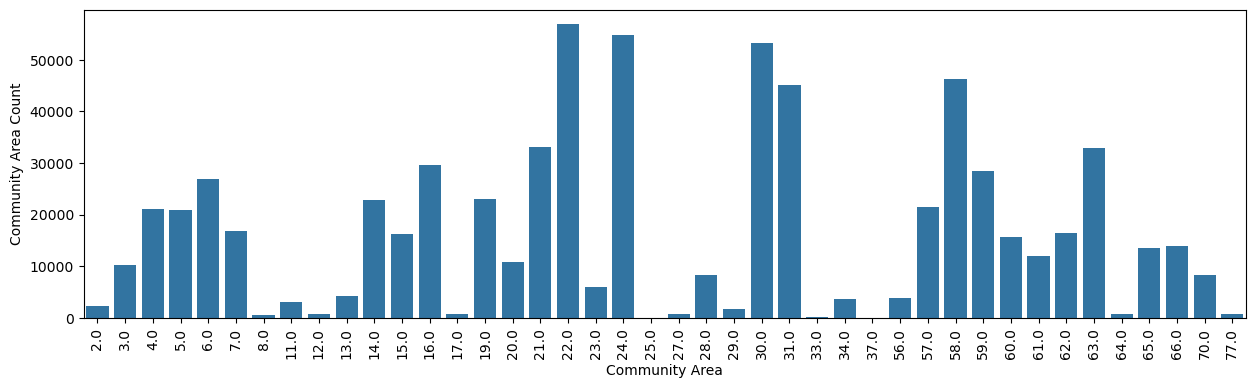

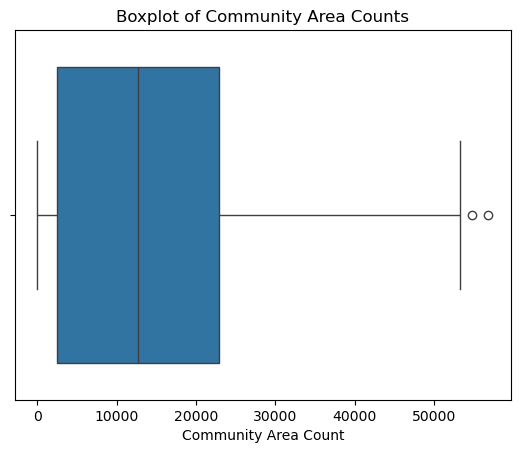

(658812, 21)

In [306]:
#Reports by Community Area
community_counts = df_Clean['Community Area'].value_counts().reset_index()
community_counts.columns = ['Community Area', 'Community Area Count']
plt.figure(figsize=(15, 4))
sn.barplot(x='Community Area', y='Community Area Count', data=community_counts)
plt.xticks(rotation=90)
plt.show()

#boxplot
sn.boxplot(x=community_counts['Community Area Count'])
plt.title("Boxplot of Community Area Counts")
plt.show()

#Categorical Data so remove values that make up very little of dataset
df_Clean = remove_rarity(df_Clean, 'Community Area')

df_Clean.shape

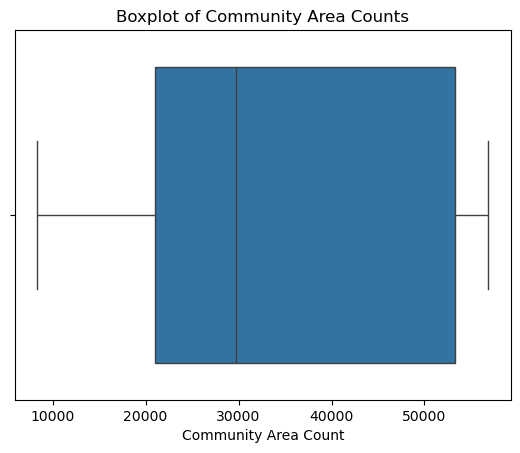

In [307]:
#Save cleaned data
community_counts_cleaned = df_Clean['Community Area'].value_counts()
df_Clean['Community Area Count'] = df_Clean['Community Area'].map(community_counts_cleaned)

#boxplot
sn.boxplot(x=df_Clean['Community Area Count'])
plt.title("Boxplot of Community Area Counts")
plt.show()

To remove outliers from the Community Areas, I filtered out of the Community Areas that made up less than 1% of the data. This removed uncommon or rare Community Areas that are rarely graffitied.

In [308]:
df.describe 

<bound method NDFrame.describe of         Creation Date           Status Completion Date Service Request Number  \
0          12/11/2017        Completed      12/12/2017            17-08320282   
1          12/12/2017        Completed      12/12/2017            17-08340031   
2          12/12/2017        Completed      12/12/2017            17-08339815   
3          12/11/2017        Completed      12/12/2017            17-08309316   
4          12/12/2017  Completed - Dup      12/12/2017            17-08331494   
...               ...              ...             ...                    ...   
1052674    10/09/2017        Completed      10/10/2017            17-06765187   
1052675    10/06/2017        Completed      10/10/2017            17-06706529   
1052676    10/10/2017        Completed      10/10/2017            17-06786166   
1052677    10/10/2017        Completed      10/10/2017            17-06795427   
1052678    10/09/2017        Completed      10/10/2017            17-067576

In [309]:
df_Clean.describe

<bound method NDFrame.describe of         Creation Date           Status Completion Date Service Request Number  \
0          2017-12-11        Completed      2017-12-12            17-08320282   
1          2017-12-12        Completed      2017-12-12            17-08340031   
3          2017-12-11        Completed      2017-12-12            17-08309316   
4          2017-12-12  Completed - Dup      2017-12-12            17-08331494   
6          2018-02-22        Completed      2018-02-22            18-00728039   
...               ...              ...             ...                    ...   
1052673    2017-10-10        Completed      2017-10-10            17-06803286   
1052674    2017-10-09        Completed      2017-10-10            17-06765187   
1052676    2017-10-10        Completed      2017-10-10            17-06786166   
1052677    2017-10-10        Completed      2017-10-10            17-06795427   
1052678    2017-10-09        Completed      2017-10-10            17-067576

## Comparing original dataframe to cleaned dataframe
A significant amount of rows have been removed in the cleaning process, which is likely from removing outliers and irrelevant information. Additionaly new columns have been created to save new, clean information from the dataframe. In conclusion, the concise data will now be more represenative in analysis.

# Evaluating Distribution

In [310]:
#Check available columns
df_Clean.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'Street Address', 'ZIP Code', 'Ward',
       'Police District', 'Community Area', 'Latitude', 'Longitude',
       'Location', 'Completion Time (Days)', 'Creation Month', 'Type Count',
       'Surface Count', 'ZIP Code Count', 'Ward Count',
       'Police District Count', 'Community Area Count'],
      dtype='object')

In [311]:
#Check for columns with specific numeric data
columns = df_Clean.select_dtypes(include='number').columns
print(columns)

Index(['ZIP Code', 'Ward', 'Police District', 'Community Area', 'Latitude',
       'Longitude', 'Completion Time (Days)', 'Creation Month', 'Type Count',
       'Surface Count', 'ZIP Code Count', 'Ward Count',
       'Police District Count', 'Community Area Count'],
      dtype='object')


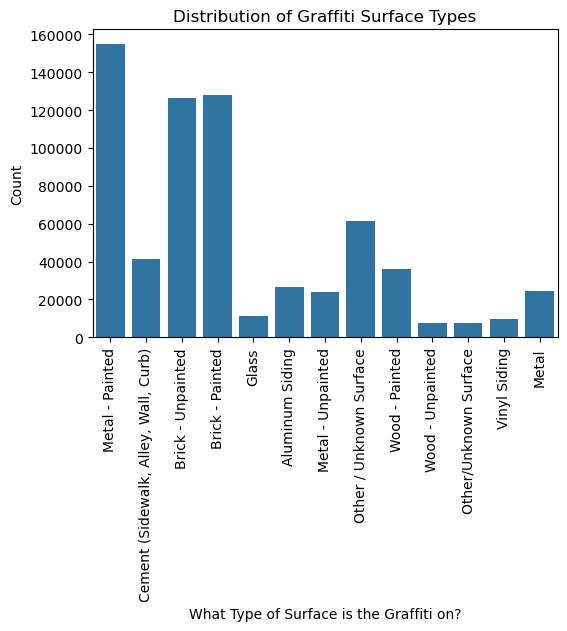

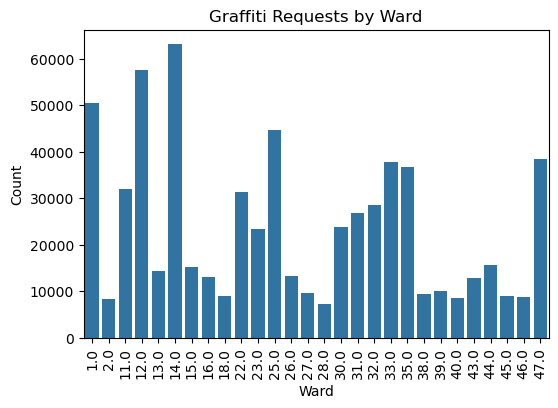

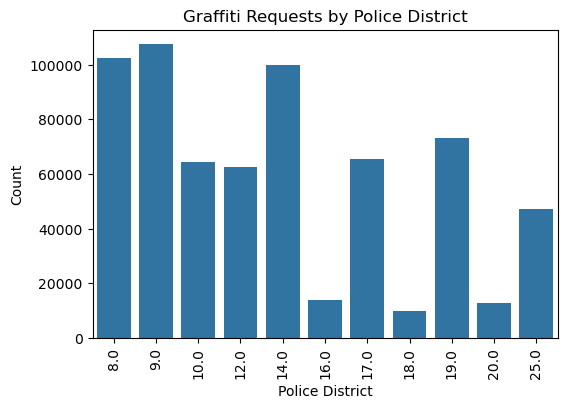

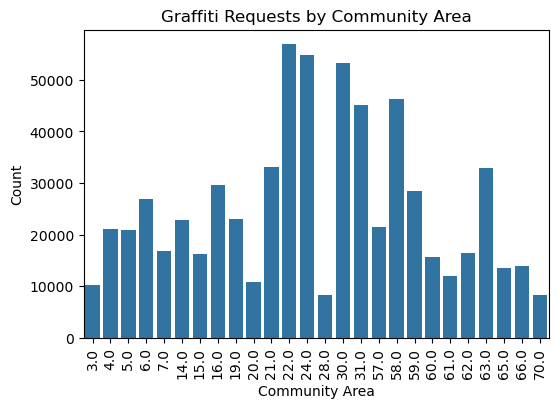

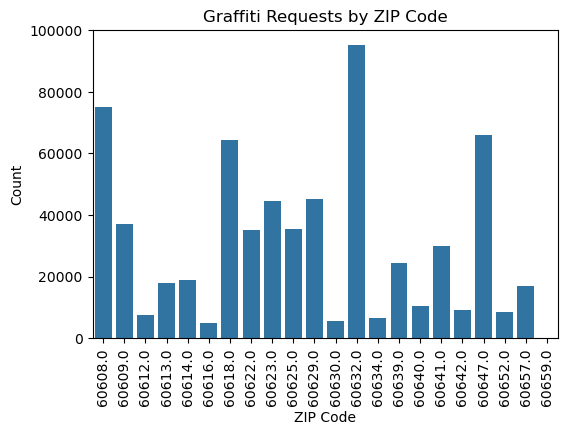

In [312]:
#Ploting original columns - categorical data
columns = [
    ('What Type of Surface is the Graffiti on?', 'Distribution of Graffiti Surface Types'),
    ('Where is the Graffiti located?', 'Distribution of Graffiti Locations'),
    ('Ward', 'Graffiti Requests by Ward'),
    ('Police District', 'Graffiti Requests by Police District'),
    ('Community Area', 'Graffiti Requests by Community Area'),
    ('ZIP Code', 'Graffiti Requests by ZIP Code')]

# Loop through the list of columns
for col, title in columns:
    plt.figure(figsize=(6, 4))
    sn.countplot(data=df_Clean, x=col)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [313]:
categorical_cols = [
    'What Type of Surface is the Graffiti on?',
    'Where is the Graffiti located?',
    'Ward', 
    'Police District',
    'Community Area', 
    'ZIP Code'
]

# Convert to categorical dtype (saves memory + enforces correct treatment)
df_Clean[categorical_cols] = df_Clean[categorical_cols].astype('category')

The distributions for these graphs, just represents the counts for the categorical data. It is difficult to determine trends because most of the numeric data for these columns act as IDs so I continued to do more analysis with the count data. 

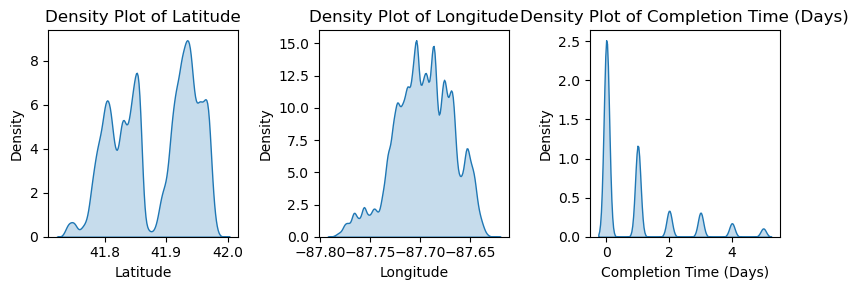

In [314]:
#Plot for continuous numeric data
numData = ['Latitude', 'Longitude', 'Completion Time (Days)']

plt.figure(figsize=(8, 3))
for i, var in enumerate(numData):
    plt.subplot(1, 3, i + 1) 
    sn.kdeplot(df_Clean[var], fill=True) 
    plt.title(f'Density Plot of {var}')    
plt.tight_layout()
plt.show()

There are two peaks within the latitude density, likely from the borders of the city.
The the density of the longitude appears almost normal. Lastly the density for the completion time, is very left skewed since most reports were removed the same day they were started. 

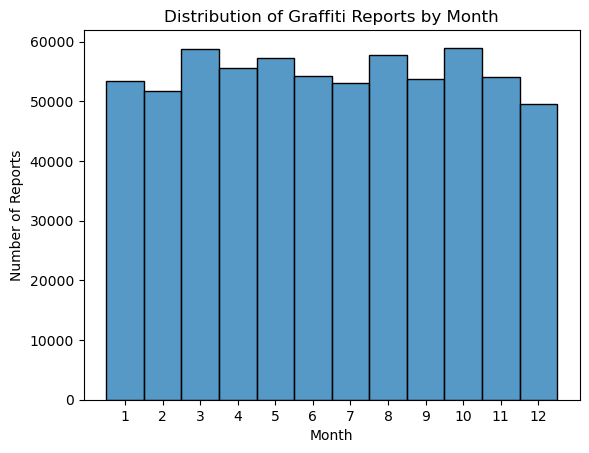

In [315]:
#Plot for Monthly reports
sn.histplot(df_Clean['Creation Month'], bins=12, discrete=True)
plt.xticks(range(1, 13)) 
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.title("Distribution of Graffiti Reports by Month")
plt.show()

In [316]:
df_Clean['Creation Month'].value_counts().rank

<bound method NDFrame.rank of Creation Month
10    59000
3     58862
8     57849
5     57264
4     55650
6     54277
11    54135
9     53829
1     53490
7     53065
2     51776
12    49615
Name: count, dtype: int64>

The distribution of the reports by month is suprisingly almost level. It does appear that the most graffiti reports were from October and the least were from December.

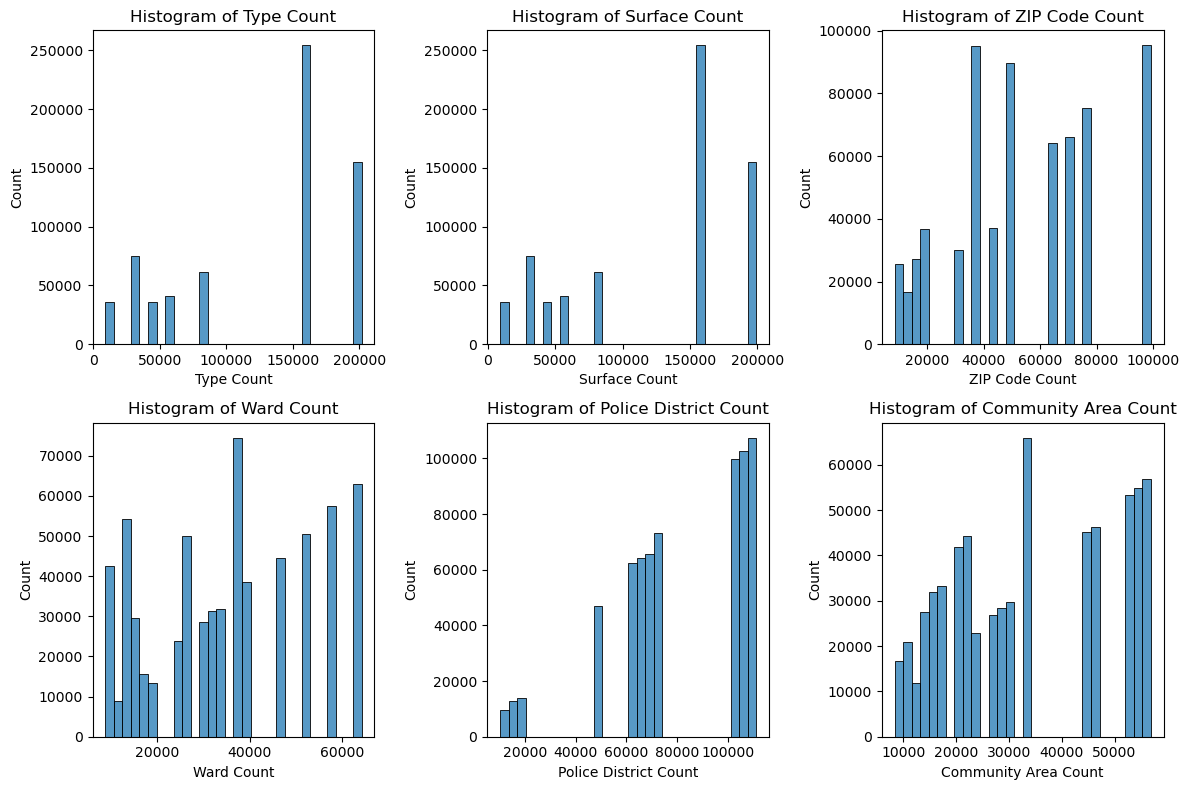

In [317]:
#Plot for Count-Based Data
numData = ['Type Count', 'Surface Count', 'ZIP Code Count', 
            'Ward Count', 'Police District Count', 'Community Area Count']

plt.figure(figsize=(12, 8))
for i, var in enumerate(numData):
    plt.subplot(2, 3, i + 1)
    sn.histplot(df_Clean[var], bins=30, kde=False)  # Adjust bins as needed
    plt.title(f"Histogram of {var}")
plt.tight_layout()
plt.show()

For most the of count distributions, there seems to be a positive linear trend, which is likely highlighting areas or objects that have been highly reported.

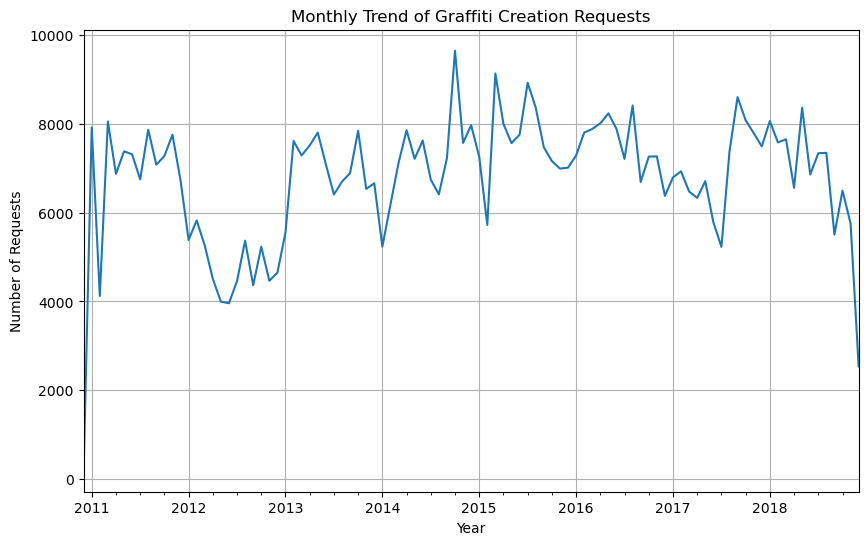

In [318]:
#Plot creation over the years
plt.figure(figsize=(10, 6))
df_Clean.groupby(df_Clean['Creation Date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Monthly Trend of Graffiti Creation Requests')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.show()

This figure demonstrates the overall trends of when graffiti was reported over time throughout the dataframe. This demonstrates clear drop in reports in 2012 and peak in 2014 and 2017. This likely be from significant social events or new city laws. 

### Check for Skewness

In [319]:
#Check skewness
numData = ['Completion Time (Days)', 'Type Count', 
           'Surface Count', 'ZIP Code Count', 'Ward Count', 
           'Police District Count', 'Community Area Count']

skewness = df_Clean[numData].skew()
print(skewness)

Completion Time (Days)    1.613021
Type Count               -0.443752
Surface Count            -0.455754
ZIP Code Count            0.122688
Ward Count                0.140642
Police District Count    -0.699175
Community Area Count      0.145697
dtype: float64


The one column with the extreme skewness are Completion Time (Days).  The Police District had moderate sknewss. All other revelant numeric columns ('Type Count', 'Surface Count', 'ZIP Code Count', 'Ward Count', 'Community Area Count') were slightly skewed

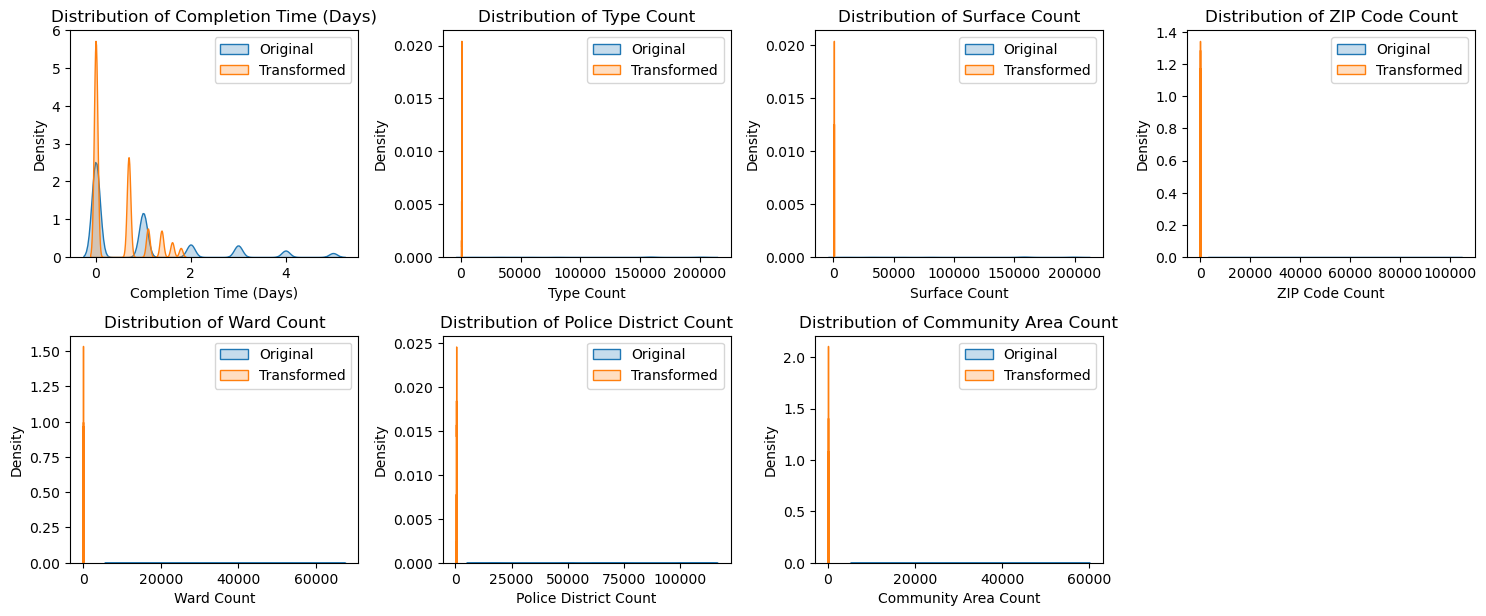

In [320]:
dfTransformed = df_Clean.copy()
#First identify possible skews
skewness = dfTransformed[numData].skew()
right_skewed = skewness[skewness > 0].index.tolist() #left side of graph
left_skewed = skewness[skewness < 0].index.tolist() #right side of graph

#Transform with log 
for col in right_skewed:
    dfTransformed[col] = np.log1p(dfTransformed[col]) 

#Transform with square root 
for col in left_skewed:
    dfTransformed[col] = np.sqrt(dfTransformed[col])

#Compare transformation
plt.figure(figsize=(15, 15))
for i, col in enumerate(numData):
    plt.subplot(5, 4, i + 1)
    sn.kdeplot(df_Clean[col], fill=True, label="Original") 
    sn.kdeplot(dfTransformed[col], fill=True, label="Transformed")
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

To keep the columns all relevant to each, I transformed all the columns in numData. Thus if the column was right-skewed, I used a log transformation to bring the values closer to 0. Then if the columns were left-skewed, I used a square-root transformation to bring the values closers to 0. This keep all the values on the same range to be analyzed further later. 

## Evaluating Scale of Numeric Variables 

In [321]:
#Visualize Distributions with boxplots
dfTransformed[['Latitude', 'Longitude']] = df_Clean[['Latitude', 'Longitude']]
numData = ['Latitude', 'Longitude','Completion Time (Days)', 'Creation Month', 'Type Count', 
           'Surface Count', 'ZIP Code Count', 'Ward Count', 
           'Police District Count', 'Community Area Count']

plt.figure(figsize=(8, 6))
sn.boxplot(data=dfTransformed[numData])
plt.title("Distribution of Scaled Features")
plt.xticks(rotation=90)
plt.show()

In [322]:
#Identify Min and Max
min_values = df_Clean[numData].min()
max_values = df_Clean[numData].max()

print('Min values:')
print(min_values)
print('\nMax values:')
print(max_values)

Min values:
Latitude                     41.734617
Longitude                   -87.786847
Completion Time (Days)        0.000000
Creation Month                1.000000
Type Count                 9060.000000
Surface Count              8854.000000
ZIP Code Count             8549.000000
Ward Count                 8906.000000
Police District Count     10212.000000
Community Area Count       8351.000000
dtype: float64

Max values:
Latitude                      41.990546
Longitude                    -87.625619
Completion Time (Days)         5.000000
Creation Month                12.000000
Type Count                201567.000000
Surface Count             199147.000000
ZIP Code Count             99204.000000
Ward Count                 64124.000000
Police District Count     111190.000000
Community Area Count       56872.000000
dtype: float64


In [323]:
#import scaler
scaler = StandardScaler()
#scale data
dfScaled = scaler.fit_transform(dfTransformed[numData])
dfScaled = pd.DataFrame(dfScaled, columns=numData)

In [324]:
dfScaled.columns

Index(['Latitude', 'Longitude', 'Completion Time (Days)', 'Creation Month',
       'Type Count', 'Surface Count', 'ZIP Code Count', 'Ward Count',
       'Police District Count', 'Community Area Count'],
      dtype='object')

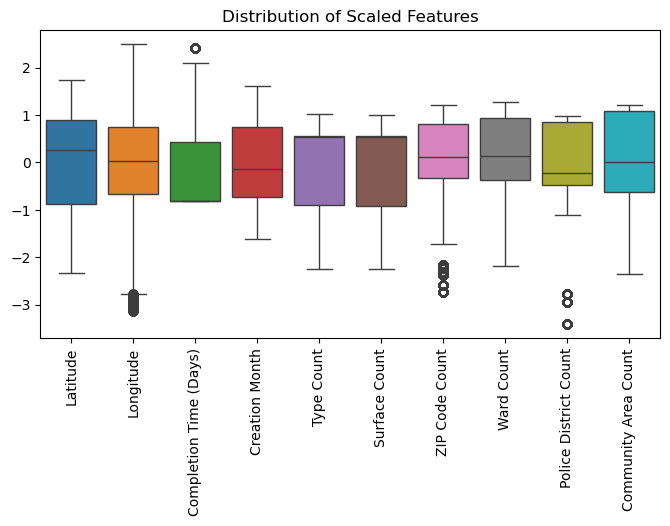

In [325]:
#Plot scaled features
plt.figure(figsize=(8, 4))
sn.boxplot(data=dfScaled[numData])
plt.title("Distribution of Scaled Features")
plt.xticks(rotation=90)
plt.show()

In [326]:
min_values = df_Clean[numData].min()
max_values = df_Clean[numData].max()

print('Min values:')
print(min_values)
print('\nMax values:')
print(max_values)

Min values:
Latitude                     41.734617
Longitude                   -87.786847
Completion Time (Days)        0.000000
Creation Month                1.000000
Type Count                 9060.000000
Surface Count              8854.000000
ZIP Code Count             8549.000000
Ward Count                 8906.000000
Police District Count     10212.000000
Community Area Count       8351.000000
dtype: float64

Max values:
Latitude                      41.990546
Longitude                    -87.625619
Completion Time (Days)         5.000000
Creation Month                12.000000
Type Count                201567.000000
Surface Count             199147.000000
ZIP Code Count             99204.000000
Ward Count                 64124.000000
Police District Count     111190.000000
Community Area Count       56872.000000
dtype: float64


I chose to scale all the releveant numeric columns ('Completion Time (Days)',
       'Completion Time (Days)', 'Creation Month', 'Type Count',
       'Surface Count', 'ZIP Code Count', 'Ward Count',
       'Police District Count', 'Community Area Count') because it continues to normalize the data and to be modeled with later. If the data was not scaled, extreme larger or smaller values would have continued to skew certain columns and make comparison much more difficult.

## Visualizing Relationships among variables in your dataset

In [327]:
corrMatrix = df_Clean.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [328]:
df_Clean.select_dtypes(include='number').corr().unstack().sort_values(ascending=False).head(50)

Latitude                Latitude                  1.000000
Longitude               Longitude                 1.000000
Police District Count   Police District Count     1.000000
Ward Count              Ward Count                1.000000
ZIP Code Count          ZIP Code Count            1.000000
Surface Count           Surface Count             1.000000
Type Count              Type Count                1.000000
Creation Month          Creation Month            1.000000
Completion Time (Days)  Completion Time (Days)    1.000000
Community Area Count    Community Area Count      1.000000
Type Count              Surface Count             0.999945
Surface Count           Type Count                0.999945
Ward Count              ZIP Code Count            0.561564
ZIP Code Count          Ward Count                0.561564
                        Police District Count     0.469906
Police District Count   ZIP Code Count            0.469906
Community Area Count    Ward Count                0.3803

This shows that the highest correlation be between type count and surface count, ward count and ZIP Code count, and Police District count and Zip Code count. It also appear that the lowest correlations were between longitude and creation month, latitude and creation month, commuinity area count and latitude. Its like to conclude from this that creation month is a very weak determining factor in this data frame while Ward, ZIP Code, and Police District can be much more useful. 

In [329]:
corrMatrix = dfScaled.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [330]:
dfScaled.select_dtypes(include='number').corr().unstack().sort_values(ascending=False).head(50)

Latitude                Latitude                  1.000000
Longitude               Longitude                 1.000000
Police District Count   Police District Count     1.000000
Ward Count              Ward Count                1.000000
ZIP Code Count          ZIP Code Count            1.000000
Surface Count           Surface Count             1.000000
Type Count              Type Count                1.000000
Creation Month          Creation Month            1.000000
Completion Time (Days)  Completion Time (Days)    1.000000
Community Area Count    Community Area Count      1.000000
Type Count              Surface Count             0.999943
Surface Count           Type Count                0.999943
ZIP Code Count          Ward Count                0.547968
Ward Count              ZIP Code Count            0.547968
                        Community Area Count      0.451521
Community Area Count    Ward Count                0.451521
ZIP Code Count          Police District Count     0.4233

In the scaled data frame, it is the same top three correlations as in the cleaned data frame. The bottom correlations are police district and surface, surface and community count, and community and type count. 

It is not suprising that type and surface count have such a high correlation because they are similar questions asking what exactly was graffiti (e.g. Garage, wall, etc.) and the surface type (e.g. brick, metal, etc.), thus there is a very high chance of materials only matching to certain things (like a sidewalk will match to cement). All other factors, seem to have some moderate correlation or close to none. It appears that location IDs connect well together, while time struggles to make connections. Further inspection will be done with these columns later in models.

## Feature Selection

### List of features that you are planning on using in your analysis
1. Type Count
2. Surface Count
3. Creation Month
5. ZIP Code Count
6. Police District Count
7. Ward Count
8. Community Area Count
9. Latitude and Longitude

### Justification explaining why you are using these particular features

1. Type and Surface Count: can be used to see how it determines what surfaces are more likely to be vandalized, which surfaces can also be easier or more difficult to clean, and more. 
2. Creation Month: can determine seasonal trends, such as more activity in the summer (warmer moths) and less in the winter (colder months).
3. ZIP Code, Police District, Ward, Community: patterns can reflect neighborhood characteristics and regional difference in Chicago neighborhoods (ex: more graffiti in an area could be due to lower socio-economic conditions and/or authoritative presence.).
8. Latitude and Longitude: can highlight hotspots in specifc areas (e.g. along highways or major roads) and identify location which could be graffitied next.

### Descriptive statistics for each feature

In [331]:
feat = ['Latitude', 'Longitude', 'Completion Time (Days)', 'Creation Month', 
            'Type Count', 'Surface Count', 'ZIP Code Count', 'Ward Count',
            'Police District Count', 'Community Area Count']

print(df_Clean[feat].describe())

            Latitude      Longitude  Completion Time (Days)  Creation Month  \
count  658812.000000  658812.000000           658812.000000   658812.000000   
mean       41.880840     -87.696988                0.866054        6.477998   
std         0.062948       0.028587                1.256367        3.413665   
min        41.734617     -87.786847                0.000000        1.000000   
25%        41.826044     -87.716129                0.000000        4.000000   
50%        41.898005     -87.696285                0.000000        6.000000   
75%        41.936992     -87.675870                1.000000        9.000000   
max        41.990546     -87.625619                5.000000       12.000000   

          Type Count  Surface Count  ZIP Code Count     Ward Count  \
count  658812.000000  658812.000000   658812.000000  658812.000000   
mean   126590.632329  125426.760757    54904.552375   35563.579772   
std     65612.734908   65158.848451    26693.185275   17058.706071   
min     

### Which features are predictors and which feature is the response?

Predictors
- Location-Based Predictors
    - Latitude and Longitude
    - ZIP Code Count
    - Police District Count
    - Ward Count
    - Community Area Count
- Graffiti Specific Predictors
    - Surface Count 
    - Type Count
- Time predictors
    - Creation Date
    - Creation Month

Response
- Completion Time (Days)
- Graffiti Occurance

**The variety of these predictors can be used to determine how likely graffiti is to occur and much time will be needed of communities to manage vandaliztion in their local neighborhood.**

### Any issues with the selected features (e.g. outliers, skewed distributions, missing values) and descriptions (including visualizations) on how you addressed these issues

In [332]:
plt.figure(figsize=(8, 4))
sn.boxplot(data=df_Clean[feat])
plt.title("Distribution of Scaled Features")
plt.xticks(rotation=90)
plt.show()

It does appear that there are outliers for Longitude and Completion Time (Days) (neither appear to be extreme). I will not be removing any outliers from these columns because it would a severe amount of locations from the data set as well as not count for other area IDs.

 It is not suprising that most of the data does not exactly align since some of the features have been transformed and scaled, while others have been not. 
For the most part, data that was skewed was transformed and scaled to minimize skewness, so likely no other efforts will be made to change distribition for any of the features. Additionally missing data has already been addressed at the beginning of data cleaning, so there are no missing entries for any rows. 

If any of these issues are discovered later in modelling, they will be address (Outliers by IQR method or rarity removal, skew by transformation and scaling, and missing values will be dropped from the data set).

## Modeling

### Model Features

In [333]:
feat = ['Latitude', 'Longitude', 'Creation Month', 'Type Count', 'Surface Count', 
        'Ward Count','Police District Count', 'Community Area Count']

In [334]:
dfScaled.shape

(658812, 10)

### Model 1 - Predicting Completion Time with Random Forest Classifer

In [335]:
#Set target
X = dfScaled[feat]
y = df_Clean['FastRemoval'] = (df_Clean['Completion Time (Days)'] <= 1).astype(int)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

#Predict and evaluate
y_pred_mod1 = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_mod1))
print("AUC:", roc_auc_score(y_test, y_pred_mod1))
print(classification_report(y_test, y_pred_mod1))

Accuracy: 0.7853949894887032
AUC: 0.6215439821661848
              precision    recall  f1-score   support

           0       0.45      0.35      0.39     26396
           1       0.85      0.89      0.87    105367

    accuracy                           0.79    131763
   macro avg       0.65      0.62      0.63    131763
weighted avg       0.77      0.79      0.77    131763



### Model 2 - Predicting Completion Time with Decision Tree Classifer

In [336]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

#target
y = df_Clean['FastRemoval'] = (df_Clean['Completion Time (Days)'] <= 1).astype(int)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train classifier
cl = DecisionTreeClassifier(min_samples_split=20, random_state=42)
cl.fit(X_train, y_train)
y_pred_mod2 = cl.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mod2))
print("AUC:", roc_auc_score(y_test, y_pred_mod2))
print(classification_report(y_test, y_pred_mod2))
print(confusion_matrix(y_test, y_pred_mod2))

Accuracy: 0.7601451090215007
AUC: 0.6005318308610544
              precision    recall  f1-score   support

           0       0.39      0.33      0.36     26396
           1       0.84      0.87      0.85    105367

    accuracy                           0.76    131763
   macro avg       0.61      0.60      0.61    131763
weighted avg       0.75      0.76      0.75    131763

[[ 8822 17574]
 [14030 91337]]


### Model 3 - Predicting ZIP Code Occurance with Logistic Regression

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

#target
y = df_Clean["ZIP Code Count"]
threshold = y.median()
y = (y >= threshold).astype(int)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train classifier
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
y_pred_mod3 = logmodel.predict(X_test)

#Evaluate
print(classification_report(y_test, y_pred_mod3))
print("Accuracy:", accuracy_score(y_test, y_pred_mod3))
print("AUC:", roc_auc_score(y_test, y_pred_mod3))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     62704
           1       0.80      0.82      0.81     69059

    accuracy                           0.80    131763
   macro avg       0.80      0.79      0.79    131763
weighted avg       0.80      0.80      0.80    131763

Accuracy: 0.7956634259997116
AUC: 0.7945904243031985


### Model 4 - Predicting ZIP Code Occurance with Random Forest Regressor 

In [338]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Set up data
y = df_Clean["ZIP Code Count"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train model
rf_zip = RandomForestRegressor(random_state=42)
rf_zip.fit(X_train, y_train)

#Predict
y_pred_rf = rf_zip.predict(X_test)

#Accuracy 
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest R² Score:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest R² Score: 0.997676236486008
Random Forest RMSE: 1286.7425591488452


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Validate

In [339]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [340]:
#Random Forest Classifier Validation
y_rf = (df_Clean['Completion Time (Days)'] <= 1).astype(int)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y_rf, cv=skf_rf, scoring='accuracy', n_jobs=-1)
print("Random Forest Classifier Validation")
print(f"Per Fold Accuracy: {rf_scores}")
print(f"Mean Accuracy: {np.mean(rf_scores)}")


Random Forest Classifier Validation
Per Fold Accuracy: [0.7865334  0.78635125 0.78811797 0.78632686 0.786084  ]
Mean Accuracy: 0.7866826962483129


In [341]:
#Decision Tree Classifier Validation
y_rf = (df_Clean['Completion Time (Days)'] <= 1).astype(int)
tree_model = DecisionTreeClassifier(min_samples_split=20, random_state=42)
tree_scores = cross_val_score(tree_model, X, y_rf, cv=skf_rf, scoring='accuracy', n_jobs=-1)
print("\nDecision Tree Classifier Validation")
print(f"Per Fold Accuracy: {tree_scores}")
print(f"Mean Accuracy: {np.mean(tree_scores)}")


Decision Tree Classifier Validation
Per Fold Accuracy: [0.76070672 0.76170093 0.76109956 0.75962721 0.75900487]
Mean Accuracy: 0.7604278587033345


In [342]:
#Logistic Regression Validation
y_log = (df_Clean["ZIP Code Count"] >= df_Clean["ZIP Code Count"].median()).astype(int)
log_model = LogisticRegression(max_iter=1000, random_state=42)
skf_log = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_scores = cross_val_score(log_model, X, y_log, cv=skf_log, scoring='accuracy', n_jobs=-1)
print("\nLogistic Regression Validation")
print(f"Per Fold Accuracy: {log_scores}")
print(f"Mean Accuracy: {np.mean(log_scores)}")


Logistic Regression Validation
Per Fold Accuracy: [0.79845632 0.79413037 0.79969946 0.79845479 0.79711905]
Mean Accuracy: 0.797571997105858


In [343]:
#Random Forest Regressor Validation
y = df_Clean["ZIP Code Count"]
rf_reg_model = RandomForestRegressor(random_state=42)
kf = KFold(n_splits=3, shuffle=True, random_state=42)
r2_scores = cross_val_score(rf_reg_model, X, y, cv=kf, scoring='r2', n_jobs=-1)
print("\nRandom Forest Regressor Validation")
print(f"Mean R²: {np.mean(r2_scores)}")


Random Forest Regressor Validation
Mean R²: 0.9973196321164882


All models were validated using 5-Fold Cross-Validation to assess generalization performance, except for the Random Forest Regressor. Classification models used StratifiedKFold with accuracy as the scoring metric, while the Random Forest Regressor was evaluated using R² across folds, achieving a mean R² of 0.9973. Overall, all model accuracies were well-validated, supporting the reliability of their predictions.

## Results

| Model | Model Name              | Target Variable       | Task Type     | Accuracy / R²       | AUC / RMSE            | Cross-Validation Accuracy |
|--------|-------------------------|------------------------|----------------|----------------------|------------------------|----------------------------|
| 1      | Random Forest Classifier | Completion Time        | Classification | 0.7853949894887032   | 0.6215439821661848     | **0.7867**                 |
| 2      | Decision Tree Classifier | Completion Time        | Classification | 0.7601451090215007   | 0.6005318308610544     | **0.7604**                 |
| 3      | Logistic Regression       | ZIP Code Count         | Classification | 0.7956634259997116   | 0.7945904243031985     | **0.7976**                 |
| 4      | Random Forest Regressor  | ZIP Code Count         | Regression     | 0.997676236486008    | 1286.7425591488452     | **0.9973**                          |


## Discussion 

The results from my 4 models highlight different predictive methods for both classification and regression. The Random Forest Classifier, trained to predict whether graffiti would be removed within one day, had an accuracy of approximately 78.5% with an AUC of 0.62, making it the most balanced and effective classification model for predicting fast removals. The Decision Tree Classifier performed slightly lower with an accuracy of 76.0% and an AUC of 0.60, but still demonstrated consistent predictions. For classifying ZIP Codes, Logistic Regression performed well with an accuracy of nearly 79.6% and an AUC of 0.79, showing that this simple linear model was able to capture meaningful patterns. However, the most accurate model overall was the Random Forest Regressor, which predicted ZIP Code graffiti volume as a continuous variable. This model achieved a very high R² of 0.998 and a low RMSE of 1286.7, demonstrating its impressive prediction for modeling graffiti frequency across Chicago neighborhoods. These results suggest that tree-based models are effective for capturing nonlinear trends in graffiti occurrence and removal times, while logistic regression remains a strong and interpretable choice for binary classification tasks.

Random Forest and Decision Tree classifiers were chosen because they are non-linear models that handle categorical and numerical features well without requiring complex manipulation. Logistic Regression was included as a simple, interpretable baseline of ZIP Code graffiti activity. The Random Forest Regressor was selected for its ability to model complex, nonlinear relationships and provide insight into variable importance when predicting graffiti occurrence.

Among all models tested, the Random Forest Regressor stood out as the best-performing model, achieving an R² score of 0.998 and a low RMSE of 1286.7 when predicting ZIP Code graffiti frequency. This indicates that it was highly effective at capturing spatial trends and feature interactions in the data. Its strong performance suggests it would be highly useful for forecasting future graffiti occurrences and identifying neighborhoods most in need of city resources and surveillance.

## Conclusion

This project showed how important it is to thoroughly clean, transform, and select features when working with real-world data. I learned that complex city problems like graffiti can be better understood using a variety of data-driven approaches, and that comparing different models helps highlight trade-offs and strengths. I also got more comfortable handling choosing evaluation metrics like AUC and interpreting results in the context of public service, especially with a large dataset like this one.

The best-performing model was the Random Forest Regressor, which achieved an R² of 0.998 and a low RMSE. It stood out because it captured complex patterns and relationships in the data that other models missed. It was especially useful for predicting how many graffiti reports would occur in each ZIP Code, which can help the city identify neighborhoods most at risk and better plan for cleanup or prevention.

Some limitations were that the dataset only included reported graffiti, so underreporting could introduce bias, especially in certain areas. Some features like surface type and location also were not always consistent or reported strangely. If I had more time, I would look into adding time-based trends, crime or socioeconomic data, and use clustering or mapping to get a better understanding of neighborhood-level patterns.

I would hope though that this data could be useful for the average Chicago resident, so they can better understand their neighborhood or give the city better tools to respond.

## References 

https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Graffiti-Removal-Historical/hec5-y4x5/about_data 

https://www.chicago.gov/city/en/depts/dcd/provdrs/ec_dev.emailsend.html#:~:text=Special%20Service%20Areas%2C%20known%20as,tax%20levy%20within%20contiguous%20areas

http://www.encyclopedia.chicagohistory.org/pages/535.html#:~:text=As%20the%20lettering%20became%20more,in%20Chicago%20in%20the%201980s 

https://www.chicago.gov/city/en/depts/streets/provdrs/graffiti_blasters/svcs/graffiti_removal.html 
